In [204]:
#import numpy,matplotlib,pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
#load the dataset
#LoadDataset=pd.read_csv('loan_data_2007_2014.csv')
LoadDataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/Credit risk analysis/loan_data_2007_2014.csv')
#create a copy of original dataset so that orginal dataframe is not disturbed
Load_DS=LoadDataset.copy()

Load_DS
#print the basic info of the dataframe
Load_DS.info()

<ipython-input-206-1421f09a73ac>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  LoadDataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/Credit risk analysis/loan_data_2007_2014.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# PRE-PROCESING

In [207]:
#check the emp-length column unique values
Load_DS['emp_length'].unique()
#list=Load_DS.columns.values
#list
#np.unique(list)

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [208]:
#column_list = Load_DS.columns.values.tolist()
#for column_name in column_list:
#   print(Load_DS[column_name].unique())

In [209]:
Load_DS.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
#for col in Load_DS:
 # print(Load_DS[col].unique())

In [211]:
#unique_values_per_variable={}
#for column in Load_DS.columns:
 # unique_values_per_variable[column]=Load_DS[column].unique()

#for column,unique_values in unique_values_per_variable.items():
 # print(f" {column}:{unique_values}")

In [212]:
Load_DS['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [213]:
#replace all the extra letters and convert this column into numeric format

#one-sample conversion code is written write for the rest
Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('\+ years','')

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('< 1 year',str(0))

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('n/a',str(0))

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('years','')

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('year','')


<ipython-input-213-f45237a5f924>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('\+ years','')


In [214]:
Load_DS['emp_length_int'].unique()

array(['10', '0', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [215]:
#check the type of emp_length_int
type(Load_DS['emp_length_int'][0])

str

In [216]:
#convert it into numrical format
Load_DS['emp_length_int'] =  pd.to_numeric(Load_DS['emp_length_int'])

In [217]:
#check the type of emp_length_int
type(Load_DS['emp_length_int'][0])

numpy.float64

In [218]:
#print the dataframe
Load_DS.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [219]:
#repeating the similar steps as we have done for previous column emp_length

#check the unique values of term column
Load_DS['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [220]:
#do all the necesaary replacements to convert into numeric
Load_DS['term_int']=Load_DS['term'].str.replace('months','')
Load_DS['term_int'].unique()

array([' 36 ', ' 60 '], dtype=object)

In [221]:
#check the type of term_int
type(Load_DS['term_int'][0])

str

In [222]:
#convert it into numrical format
Load_DS['term_int']=pd.to_numeric(Load_DS['term_int'])

In [223]:
#check the type
type(Load_DS['term_int'][0])

numpy.int64

In [224]:
#check for the column called earliest_cr_line
Load_DS['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [225]:
#convert into datetime
Load_DS['earliest_cr_line_date']=pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')

In [226]:
#check the newly created column i.e 'earliest_cr_line_date'
Load_DS['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [227]:
#get the total number of days from current date i.e present date
pd.to_datetime('2019-12-01')-Load_DS['earliest_cr_line_date']

0        12752 days
1         7549 days
2         6604 days
3         8704 days
4         8735 days
            ...    
466280    6088 days
466281    8218 days
466282    6574 days
466283    6147 days
466284    7243 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [228]:
#convert these days into months i.e converting days into months
Load_DS['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2019-12-01')-Load_DS['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [229]:
#check the basic statistics of 'mths_since_earliest_cr_line'
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        263.482430
std          93.974829
min        -588.000000
25%         207.000000
50%         249.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [230]:
#check the dataframe for column that have negitive months which is not possible
Load_DS.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-513.0
1770,Sep-68,2068-09-01,-585.0
2799,Sep-64,2064-09-01,-537.0
3282,Sep-67,2067-09-01,-573.0
3359,Feb-65,2065-02-01,-542.0
...,...,...,...
464003,Jan-68,2068-01-01,-577.0
464260,Jul-66,2066-07-01,-559.0
465100,Oct-67,2067-10-01,-574.0
465500,Sep-67,2067-09-01,-573.0


In [231]:
#replace all the negitive values  with the max months value
Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()

<ipython-input-231-778ec70b9e7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()


In [232]:
#again check the basic stats so that no months are negitive
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [233]:
#check the issue_d column
Load_DS['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [234]:
#repeat the similar steps as we have done for 'earliest_cr_line'

#convert into date_time format
Load_DS['issue_date']=pd.to_datetime(Load_DS['issue_d'],format='%b-%y')
type(Load_DS['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [235]:
#get the number of days from present date
pd.to_datetime('2019-12-01')-Load_DS['issue_date']

0        2922 days
1        2922 days
2        2922 days
3        2922 days
4        2922 days
            ...   
466280   2160 days
466281   2160 days
466282   2160 days
466283   2160 days
466284   2160 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [236]:
#convert days to months
Load_DS['mths_since_issued_date']=round(pd.to_numeric((pd.to_datetime('2019-12-01')-Load_DS['issue_date'])/np.timedelta64(1,'M')))

In [237]:
#check the basic stats
Load_DS['mths_since_issued_date'].describe()

count    466285.000000
mean         75.255187
std          14.340154
min          60.000000
25%          65.000000
50%          71.000000
75%          81.000000
max         150.000000
Name: mths_since_issued_date, dtype: float64

In [238]:
#check the 'delinq_2yrs' column and convert it into float type
Load_DS['delinq_2yrs']=Load_DS['delinq_2yrs'].astype(float)

In [239]:
Load_DS['term_int'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [240]:
#check the basic stats
Load_DS['delinq_2yrs'].describe()

count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

PREPROCESSING MISSING DATA

In [241]:
Load_DS['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [242]:
#Get the dummies value for the column 'grade',,,apply a (prefix='grade') and (prefix_sep=":")
pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [243]:
#Similarly apply the dummy creation step for 'grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status' in one list_comprehension
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                 pd.get_dummies(Load_DS['verification_status'],prefix='verification_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['loan_status'],prefix='loan_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['purpose'],prefix='purpose',prefix_sep=':'),
                 pd.get_dummies(Load_DS['addr_state'],prefix='addr_state',prefix_sep=':'),
                 pd.get_dummies(Load_DS['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]


In [244]:
#concat all and create a dataframe
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)

In [245]:
#check the dummy var dataframe
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [246]:
#conact this dummy var dataframe with the original Load_DS dataframe
Load_DS=pd.concat([Load_DS,Load_dumies_Data], axis=1)

In [247]:
#check the column names
Load_DS.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

MISSING VALUES

In [248]:
#chekc the missing values
Load_DS.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [249]:
pd.options.display.max_rows= None

In [250]:
#print the sum of all null values of all columns
Load_DS.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [251]:
pd.options.display.max_rows =100

In [252]:
#fill the null values in column 'total_rev_hi_lim' with Loan_DS['funded_amt']
Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'],inplace=True)

In [253]:
#check the null values in column 'total_rev_hi_lim'
Load_DS['total_rev_hi_lim'].isnull().sum()

0

In [254]:
#fill the 'annual_inc' null values with mean value of 'annual_inc' column
Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(),inplace=True)

In [255]:
#check the null values in 'annual_inc'
Load_DS['annual_inc'].isnull().sum()

0

In [256]:
#fill all null values in column 'mths_since_earliest_cr_line' with '0'
Load_DS['mths_since_earliest_cr_line'].fillna('0',inplace=True)

In [257]:
#check the sum of null values for this column
Load_DS['mths_since_earliest_cr_line'].isnull().sum()

0

In [258]:
#fill all null values in column 'acc_now_delinq' with '0'
Load_DS['acc_now_delinq'].fillna('0',inplace=True)

In [259]:
#check the sum of null values for this column
Load_DS['acc_now_delinq'].isnull().sum()

0

In [260]:
#fill all null values in column 'total_Acc' with '0'
Load_DS['total_acc'].fillna('0',inplace=True)

In [261]:
#similary fill the columns 'pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int' with '0'
Load_DS['pub_rec'].fillna('0',inplace=True)
Load_DS['open_acc'].fillna('0',inplace=True)
Load_DS['inq_last_6mths'].fillna('0',inplace=True)
Load_DS['delinq_2yrs'].fillna('0',inplace=True)
Load_DS['emp_length_int'].fillna('0',inplace=True)

PD(PROBABLITY OF DEFAULT)

Building the Weight of expetency values

In [262]:
#check the unique values in our final output column i.e 'loan_status'
Load_DS['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [263]:
#chekc the value_counts for loan_status
Load_DS['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [264]:
#check the percentage of distribution
#Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count()
round((Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count())*100,2)

Current                                                48.09
Fully Paid                                             39.62
Charged Off                                             9.11
Late (31-120 days)                                      1.48
In Grace Period                                         0.67
Does not meet the credit policy. Status:Fully Paid      0.43
Late (16-30 days)                                       0.26
Default                                                 0.18
Does not meet the credit policy. Status:Charged Off     0.16
Name: loan_status, dtype: float64

In [265]:
#binary encoding of our target variable
Load_DS['good_bad']=np.where(Load_DS['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [266]:
Load_DS['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

In [267]:
#import train-test split
from sklearn.model_selection import train_test_split

In [268]:
#applying the train_test split
load_ds_input_train,load_ds_input_test,load_ds_targets_train,load_ds_targets_test=train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'],test_size=0.2,random_state=42)


In [269]:
#check the shape of training and testing dataset:
load_ds_input_train.shape

(373028, 207)

In [270]:
load_ds_input_test.shape

(93257, 207)

In [271]:
load_ds_targets_train.shape

(373028,)

In [272]:
load_ds_targets_test.shape

(93257,)

DATA PREPARATION

In [273]:
#Let's so deep into data prepartion because we need to build the score-card:

df_inputs_prepr = load_ds_input_train
df_targets_prepr = load_ds_targets_train


In [274]:
#check the unique values for 'grade' column
Load_DS['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [275]:
#concat grade with df_target_prepr col and create a dataframe
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [276]:
#group by grade and check number of records in each grade
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [277]:
#get the mean of the number of records i.e here we will get only for good loans only that has binary value as '1'
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [278]:
#create a dataframe that has the number of records and mean records for grade
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
             df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [279]:
#print df1
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [280]:
#remove the grade column as it is twice
df1=df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [281]:
#replacing the column names to make it more representable
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [282]:
#df1
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [283]:
#get the proportion of n_obs
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [284]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [285]:
#calculating the number of good variables and bad varrirables

df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [286]:
#check the proportion of good and bad variables
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_good'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173


In [287]:
#calculate the Weight of Expetency(WOE):

df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286


In [288]:
#reset the index of the df1 dataframe and sort the values according to WoE

df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575


In [289]:
#calculate the difference in prop_good and WoE:

df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [290]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353


In [291]:
#calculate the IV:implied volatility:

df1['IV'] = df1['prop_n_good'] - df1['prop_n_bad']*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN,0.759664
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019,0.759664
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173,0.759664
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424,0.759664
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340,0.759664
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979,0.759664
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353,0.759664


In [292]:
#Create a final function for the the data prepation steps so that we don't need to write this code again and again

def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [293]:
Load_DS['initial_list_status']

0         f
1         f
2         f
3         f
4         f
         ..
466280    w
466281    f
466282    f
466283    w
466284    f
Name: initial_list_status, Length: 466285, dtype: object

In [294]:
#applying the function on 'grade' column:

df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN,0.759664
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019,0.759664
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173,0.759664
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424,0.759664
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340,0.759664
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979,0.759664
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353,0.759664


PROCESSING DISCRETE VARIABLES:VISUALIZING RESULTS

In [295]:
#import the visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [296]:
#function for plotting of WoE:

def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

**High WoE means the borrower chance to pay the loan on time is high:**

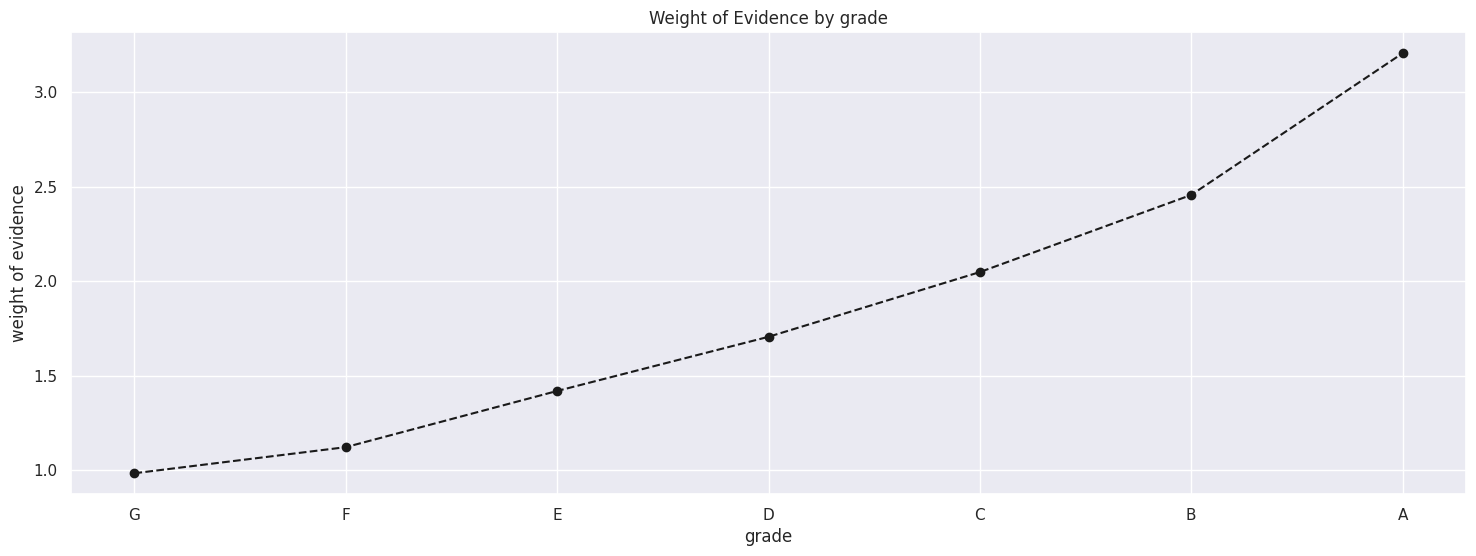

In [297]:
#pass the dataframe into the plot_by_woe function
plot_by_woe(df_temp)

Preprocessing Discrete Variables:Creating Dummy Variable,part1

In [298]:
#repeat the similar steps:
#pass the column 'home_ownership' and create the woe plot
df_temp1=woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000084,1.359143,NaN,NaN,0.743854
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000018,1.734601,0.054380,0.375458,0.743854
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.057171,1.935622,0.023870,0.201021,0.743854
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.010769,2.116915,0.018666,0.181294,0.743854
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.054691,2.240579,0.011298,0.123663,0.743854
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,0.743854


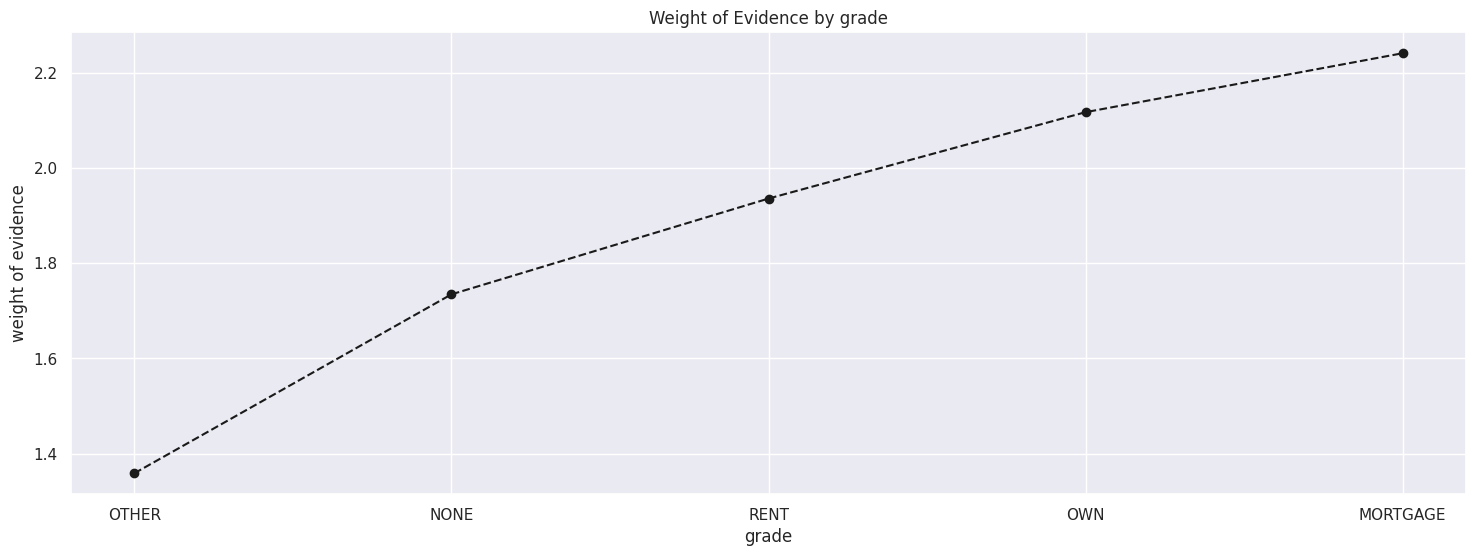

In [299]:
#plot the woe for 'home_ownersip'
plot_by_woe(df_temp1)

In [300]:
#we will be creating one hot enconding for all these unique values in each column so we will try to minimize the number of unique values by merging the unique values:

#add the binary values of values 'RENT','OTHER','NONE','ANY' as they have similar WoE values
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                           df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [301]:
df_inputs_prepr.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,0,0,0,0,1,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,0,0,0,0,1,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,0,0,0,0,1,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,0,0,0,1,0,1
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,0,0,0,1,0,0


PREPROCESSING DISCRETE VARRIABLES:DUMMMY VARRIABLES

In [302]:
#check the unique values in addr_state
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [303]:
#apply the function woe_discrete on 'addr_state'
df_temp2=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp2

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000021,-0.154151,NaN,NaN,0.743239
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000009,1.203973,0.307692,1.358123,0.743239
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.002128,1.853908,0.095355,0.649935,0.743239
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.009424,1.953320,0.011223,0.099411,0.743239
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.000740,1.964893,0.001253,0.011573,0.743239
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.001725,1.967369,0.000267,0.002476,0.743239
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.000728,2.024772,0.006045,0.057403,0.743239
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.003973,2.029543,0.000491,0.004771,0.743239
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.011248,2.030708,0.000120,0.001165,0.743239
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.001144,2.033673,0.000304,0.002965,0.743239


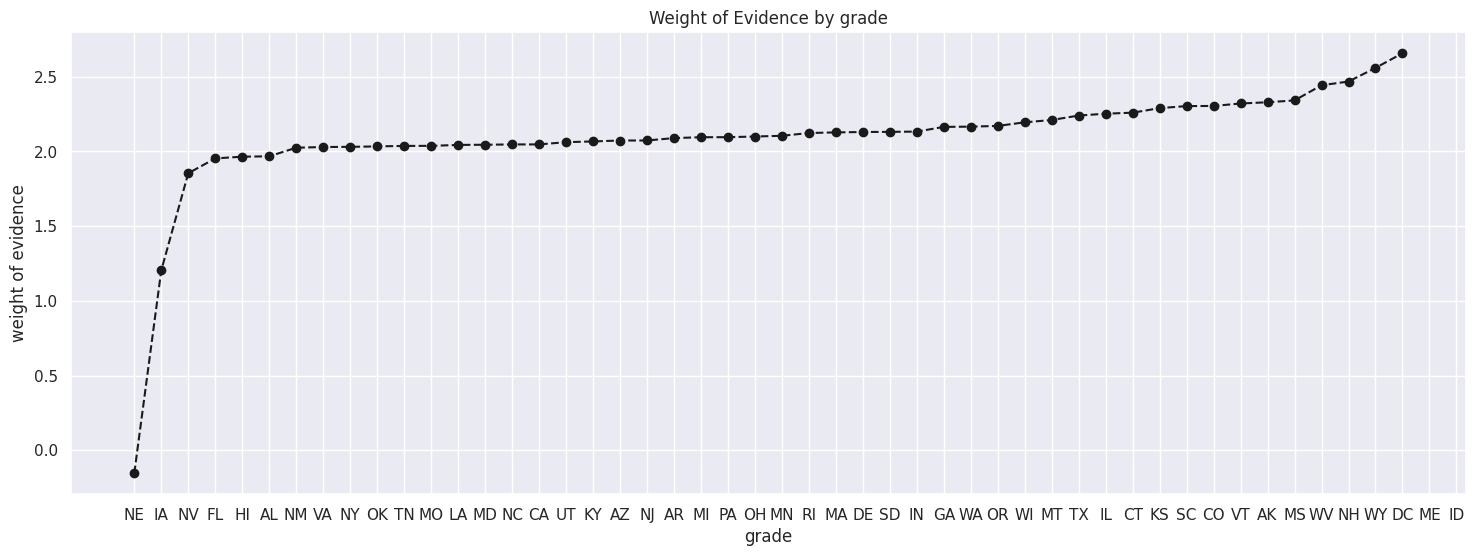

In [304]:
#plot the woe_plot
plot_by_woe(df_temp2)

In [305]:
#adding the state 'ND' if it is not present in columns and make it zero if not present
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

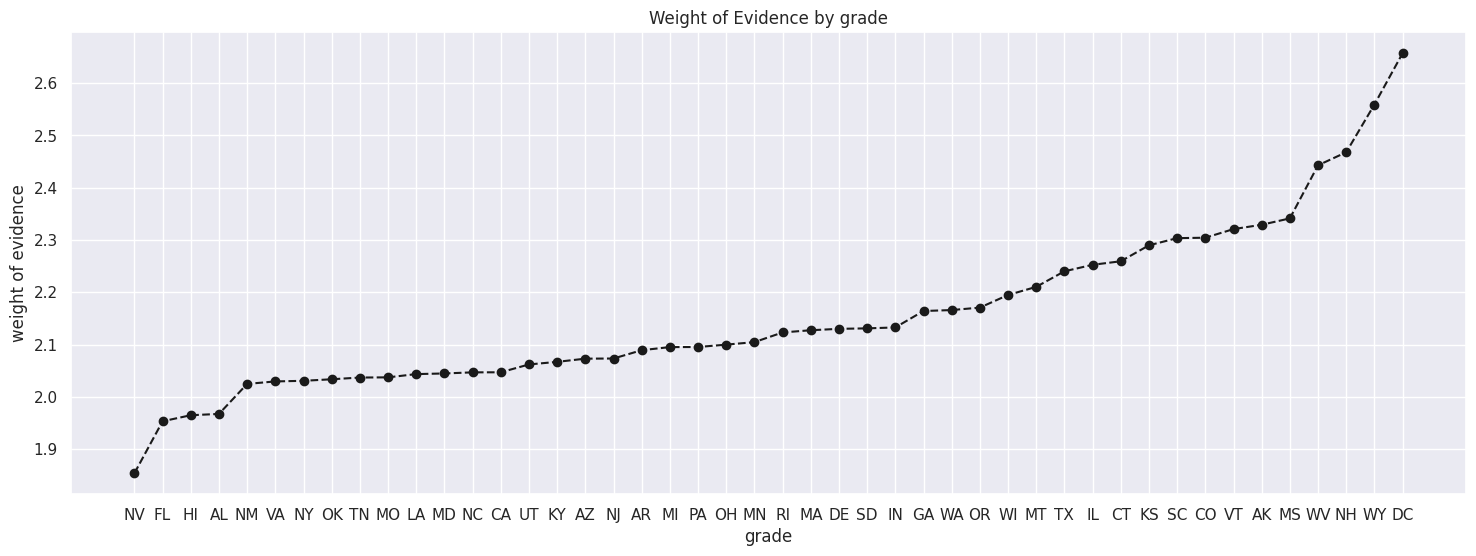

In [306]:
#plot the woe_plot
plot_by_woe(df_temp2.iloc[2:-2,:])

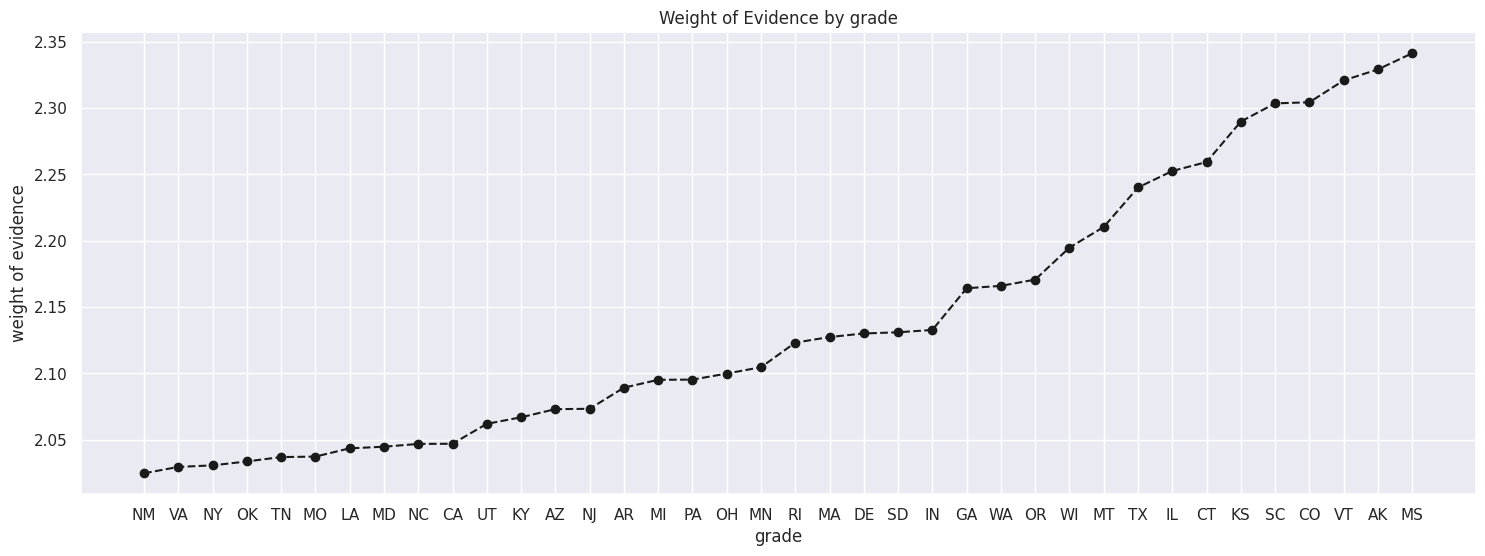

In [307]:
#woe_plot for values whose WoE values differs at large
plot_by_woe(df_temp2.iloc[6:-6,:])

In [308]:
##add the binary values of values as they have similar WoE values


df_inputs_prepr['addr_state:ND_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'],
                                                       df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])


df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])


df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])


df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])


df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [309]:
#check the unique values of verification_status column
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [310]:
#apply the woe_discrete function
df_temp3=woe_discrete(df_inputs_prepr,'verification_status',df_targets_prepr)
df_temp3

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.051467,1.925776,NaN,NaN,0.743795
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.037601,2.152666,0.023137,0.226891,0.743795
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.033664,2.261977,0.009761,0.109311,0.743795


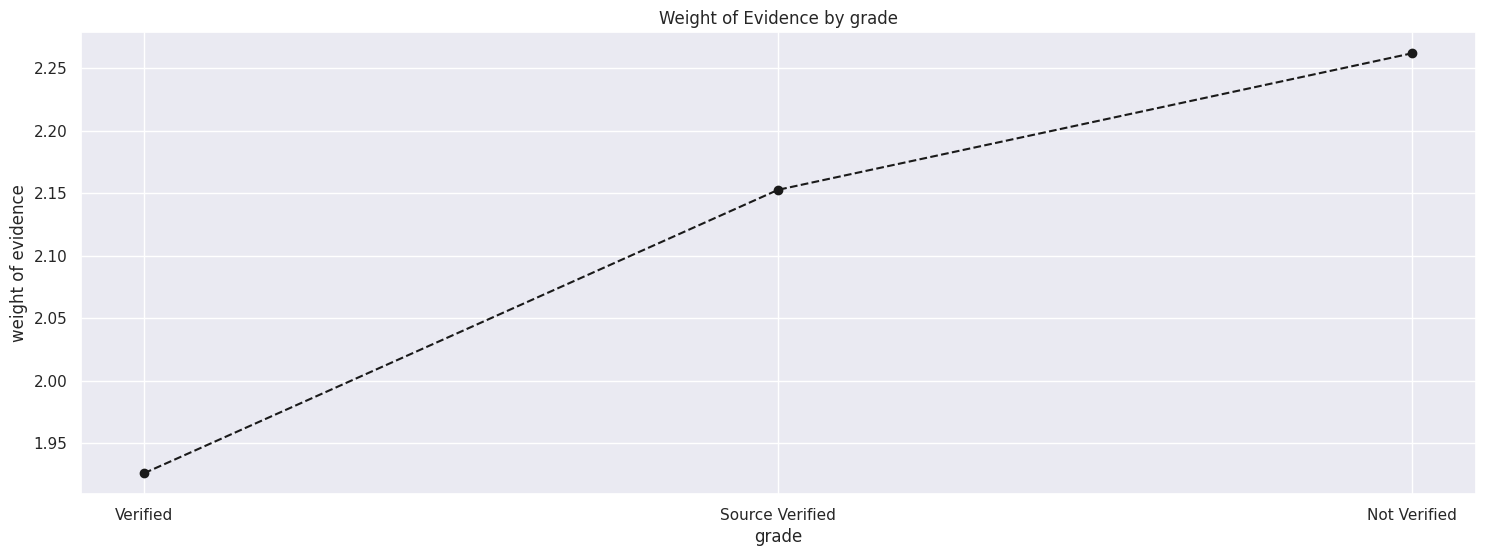

In [311]:
#plot the woe plot
plot_by_woe(df_temp3)

In [312]:
#check the unique values of 'purpose'
df_inputs_prepr['purpose'].unique()

array(['debt_consolidation', 'educational', 'other', 'home_improvement',
       'credit_card', 'major_purchase', 'wedding', 'small_business',
       'vacation', 'house', 'car', 'moving', 'renewable_energy',
       'medical'], dtype=object)

In [313]:
#apply the woe_discrete on 'purpose'
df_temp4=woe_discrete(df_inputs_prepr,'purpose',df_targets_prepr)
df_temp4

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.003594,1.301565,NaN,NaN,0.744802
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.000199,1.397594,0.015704,0.096029,0.744802
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.001156,1.654252,0.037663,0.256658,0.744802
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.000771,1.816198,0.020644,0.161946,0.744802
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.007828,1.834226,0.002155,0.018028,0.744802
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000114,1.855475,0.002504,0.021250,0.744802
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.001460,1.886445,0.003581,0.030969,0.744802
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.000671,2.009808,0.013473,0.123363,0.744802
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.000704,2.016042,0.000648,0.006234,0.744802
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.074622,2.059305,0.004413,0.043263,0.744802


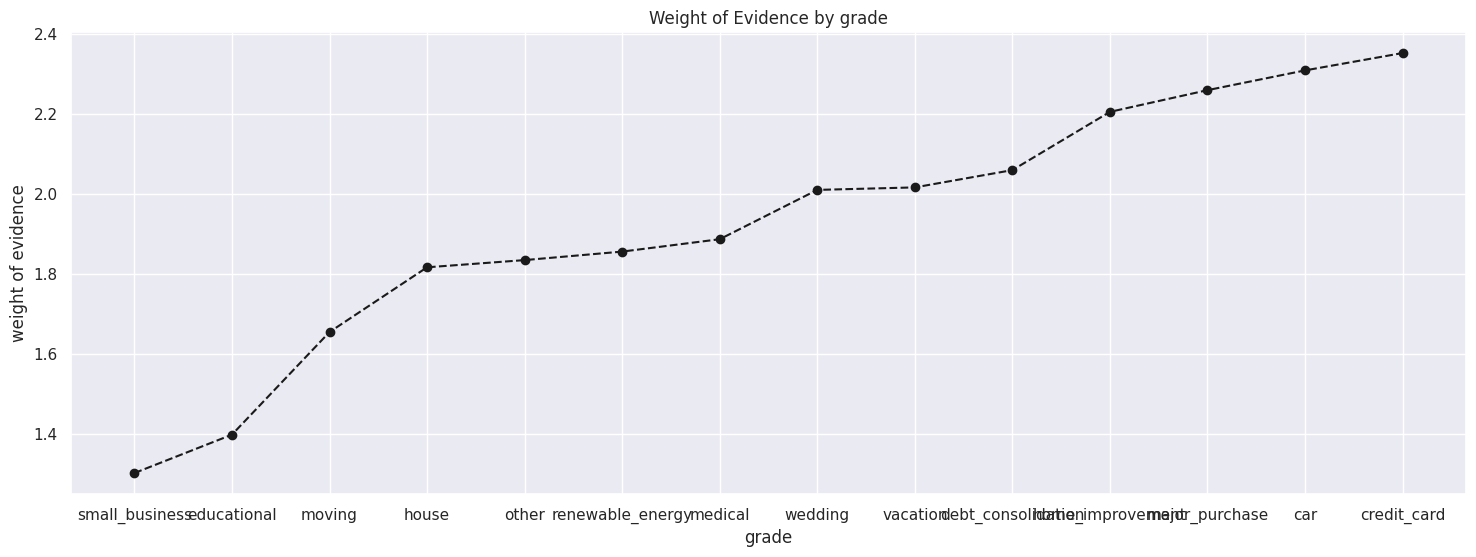

In [314]:
#plot the woe plot
plot_by_woe(df_temp4)

In [315]:
#make all the similar woe values in one column

df_inputs_prepr['purpose:educ_sm_b_wedd_ren_en_mov_house']=sum([df_inputs_prepr['purpose:small_business'],df_inputs_prepr['purpose:educational'],
                                                               df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving'],
                                  -                              df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:medical'],df_inputs_prepr['purpose:wedding'],
                                                               df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:debt_consolidation'],
                                                               df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                               df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:credit_card']])

In [316]:
#check the 'initial_list_status' unique values
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [317]:
#apply the woe_discrete function
df_temp5=woe_discrete(df_inputs_prepr,'initial_list_status',df_targets_prepr)
df_temp5

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.087813,1.989531,NaN,NaN,0.744028
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.034919,2.327206,0.031412,0.337675,0.744028


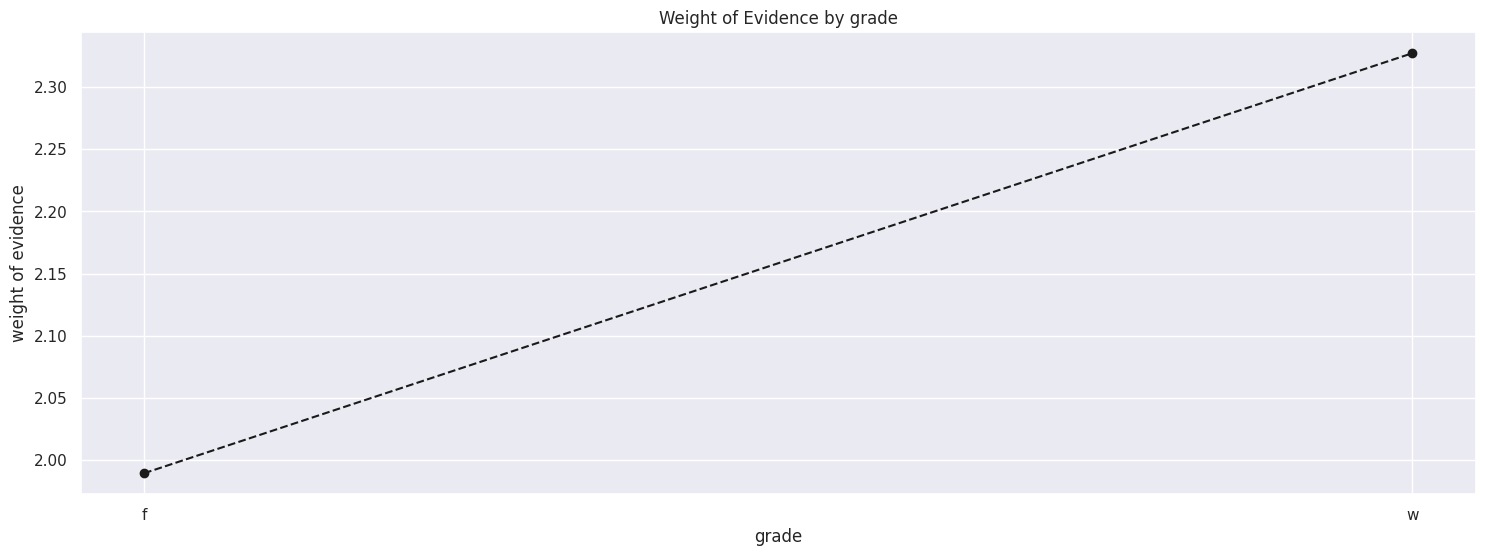

In [318]:
#plot the woe plot
plot_by_woe(df_temp5)

PREPROCESSING CONTINUOUS VARIABLES:AUTOMATING CALCULATIONS AND VISUALIZING RESULTS

In [319]:
#Earlier we defined a function for categorical values

#Now, this is the function for preprocessing of continuous variables

def woe_continuous(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

PREPROCESSING CONTNUOUS VARIABLES:CREATING DUMMY VARIABLES

In [320]:
#check the 'term_int' unique values
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [321]:
#apply the woe_continuous function
df_cont=woe_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
df_cont

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.078953,2.230954,NaN,NaN,0.745024
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.043780,1.800736,0.044756,0.430218,0.745024


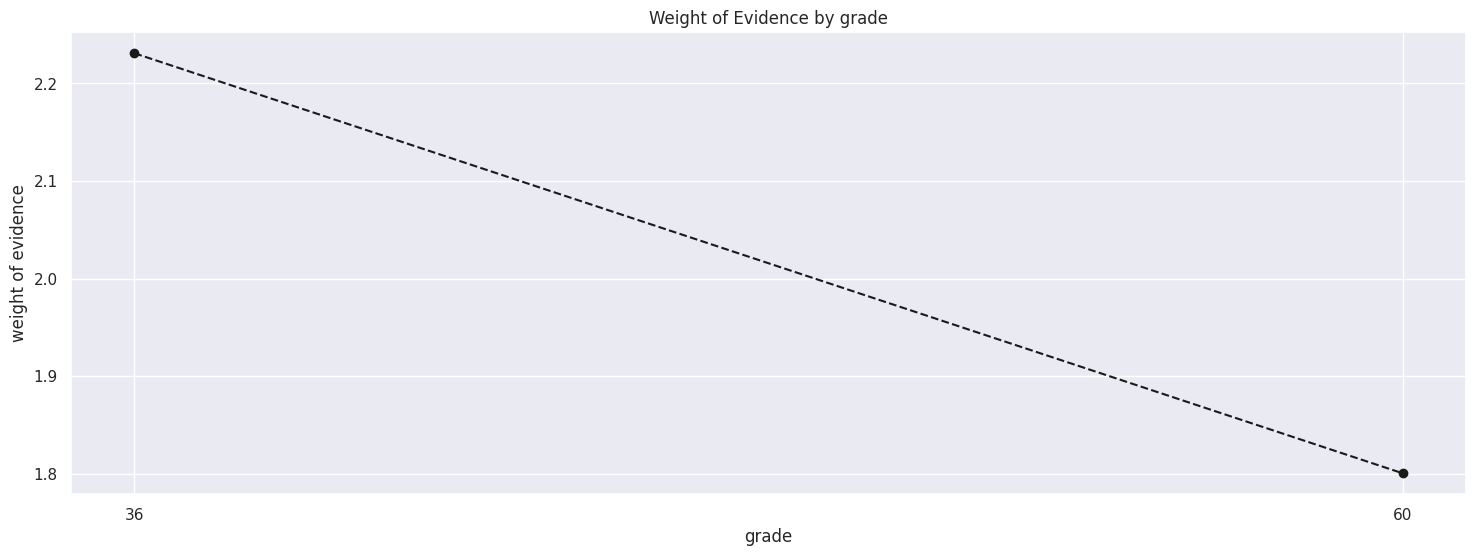

In [322]:
#plot the woe plot
plot_by_woe(df_cont)

In [323]:
#Convert it into binary encoded format by putting 1 and 0 inplace

df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int'] ==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [324]:
#check the unique values of 'emp_length_int' column
df_inputs_prepr['emp_length_int'].unique()

array([3.0, 6.0, 10.0, 7.0, 5.0, 0.0, 2.0, 9.0, 1.0, 8.0, '0', 4.0],
      dtype=object)

In [325]:
#apply the woe_continuous function
df_cont1=woe_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_cont1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,28912,0.881157,0.077506,25476.0,3436.0,0.076677,0.010342,2.003429,NaN,NaN,0.742965
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.008045,2.060416,0.005839,0.056987,0.742965
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.010856,2.100530,0.003959,0.040114,0.742965
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.009601,2.098652,0.000183,0.001878,0.742965
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.007395,2.097341,0.000128,0.001311,0.742965
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.008536,2.037955,0.005920,0.059387,0.742965
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.007299,2.029883,0.000826,0.008071,0.742965
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.007130,2.064986,0.003554,0.035102,0.742965
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.005917,2.089500,0.002425,0.024515,0.742965
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.004867,2.057085,0.003217,0.032416,0.742965


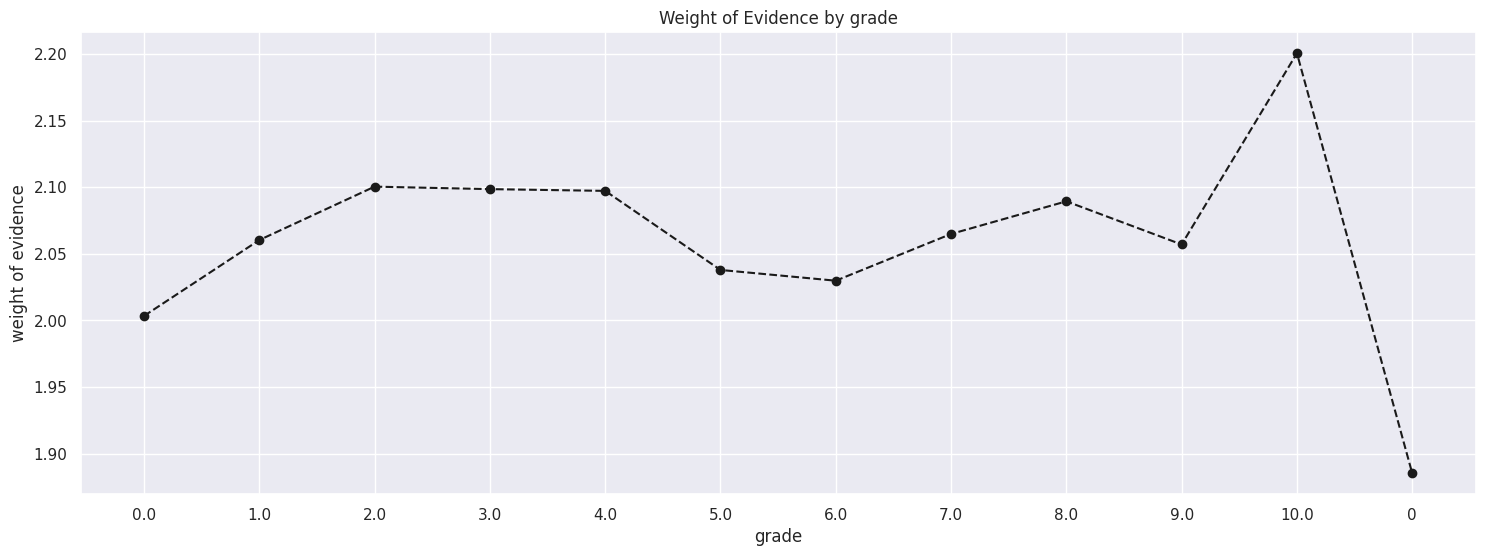

In [326]:
#plot the woe plot
plot_by_woe(df_cont1)

In [327]:
##Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [328]:
#check the unique values in 'mths_since_issued_date' column
df_inputs_prepr['mths_since_issued_date'].unique()

array([ 69.,  88.,  78.,  68., 125.,  61., 115.,  77.,  66.,  81.,  82.,
        67.,  64.,  75.,  83., 137.,  74.,  86.,  73.,  71.,  72.,  65.,
        62.,  90.,  93., 111.,  70., 100.,  87.,  63.,  85., 113.,  89.,
        80., 103.,  92.,  76.,  84.,  97.,  98.,  94., 112., 105., 106.,
        79., 127., 107.,  96., 109.,  60.,  95., 116., 101.,  91., 108.,
       110., 114., 140., 117., 119., 102.,  99., 104., 120., 118., 122.,
       128., 149., 129., 142., 134., 143., 138., 121., 126., 130., 124.,
       146., 145., 132., 141., 144., 148., 123., 139., 136., 133., 147.,
       131., 150., 135.])

In [329]:
#apply the cut function defined in pandas so that we get a range divided values for continous variable

df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['mths_since_issued_date'],50)

In [330]:
#check how the buckets are divided
df_inputs_prepr['mths_since_issued_date_factor']

427211      (67.2, 69.0]
206088      (87.0, 88.8]
136020      (76.2, 78.0]
412305      (67.2, 69.0]
36159     (124.8, 126.6]
               ...      
259178     (59.91, 61.8]
365838      (65.4, 67.2]
131932      (76.2, 78.0]
146867      (79.8, 81.6]
121958      (76.2, 78.0]
Name: mths_since_issued_date_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(59.91, 61.8] < (61.8, 63.6] < (63.6, 65.4] <
                                            (65.4, 67.2] ... (142.8, 144.6] < (144.6, 146.4] <
                                            (146.4, 148.2] < (148.2, 150.0]]

In [331]:
#apply the woe_continuous function
df_cont2=woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_cont2

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(59.91, 61.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.004897,2.792028,NaN,NaN,0.749411
1,"(61.8, 63.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.008539,2.562724,0.013820,0.229305,0.749411
2,"(63.6, 65.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.009613,2.406003,0.011140,0.156721,0.749411
3,"(65.4, 67.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.007988,2.296690,0.008681,0.109313,0.749411
4,"(67.2, 69.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.008385,2.217243,0.006815,0.079447,0.749411
5,"(69.0, 70.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.003687,2.189485,0.002486,0.027758,0.749411
6,"(70.8, 72.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.007440,2.185060,0.000401,0.004425,0.749411
7,"(72.6, 74.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.007720,2.073772,0.010572,0.111287,0.749411
8,"(74.4, 76.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.007422,1.997395,0.007804,0.076378,0.749411
9,"(76.2, 78.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.007338,1.873505,0.013660,0.123890,0.749411


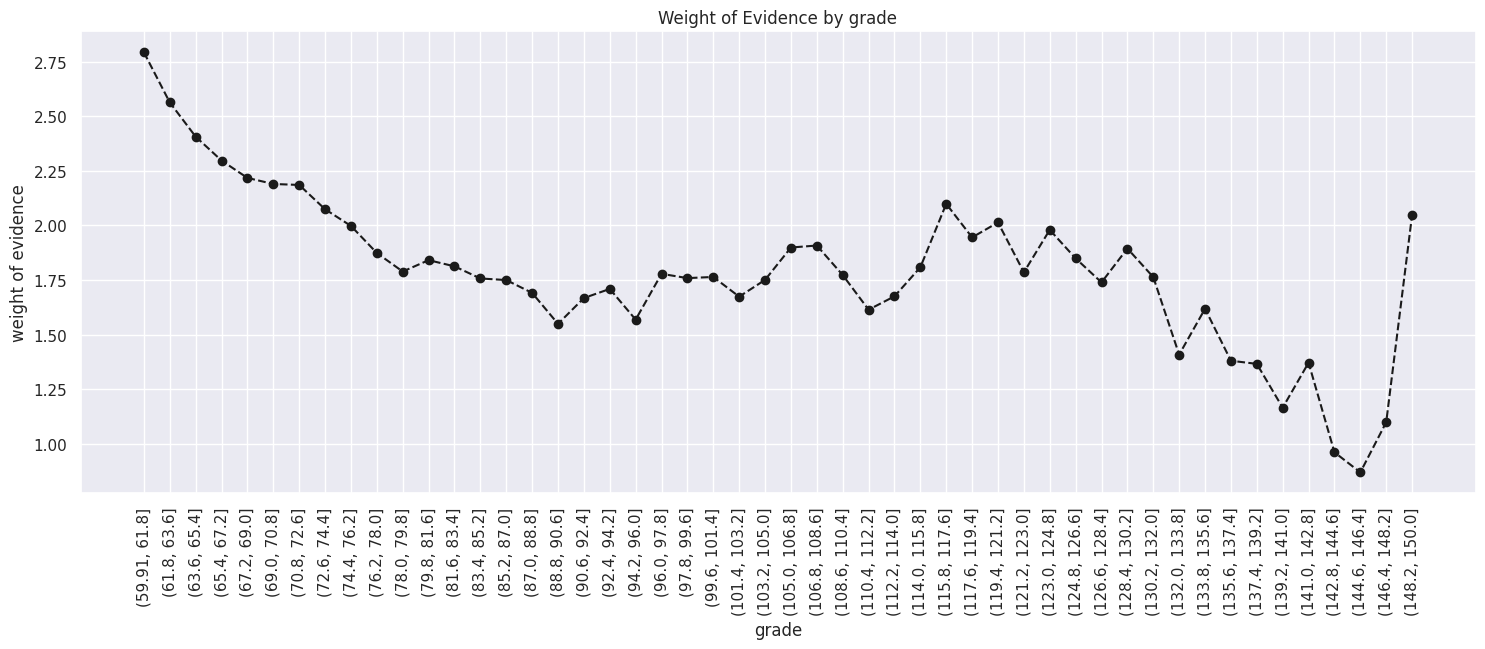

In [332]:
#plot the woe plot
plot_by_woe(df_cont2,90)

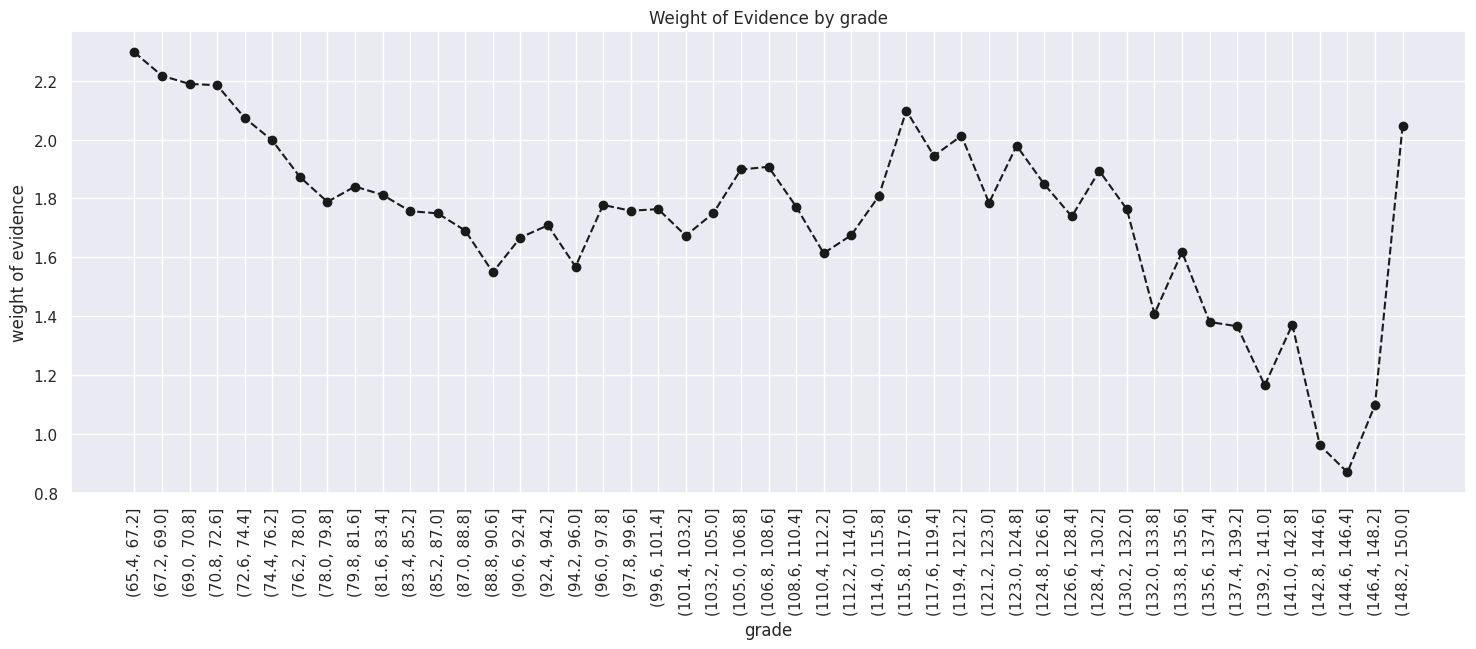

In [333]:
#more variation of woe plot
plot_by_woe(df_cont2.iloc[3:,:],90)

In [334]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_issued_date:<38']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issued_date:38-39']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issued_date:40-41']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issued_date:42-48']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issued_date:49-52']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issued_date:53-64']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issued_date:65-84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issued_date:>84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(85,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [335]:
#apply the cut function on 'int_rate_factor'
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)

In [336]:
#apply the woe_continuos function
df_cont3=woe_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_cont3

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000090,3.225520,NaN,NaN,0.762253
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.000500,3.911179,0.018592,0.685659,0.762253
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.000671,3.529126,0.008871,0.382053,0.762253
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.000147,3.585218,0.001512,0.056092,0.762253
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.000223,3.725042,0.003438,0.139824,0.762253
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.001427,3.240332,0.014131,0.484710,0.762253
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.001478,2.930080,0.013011,0.310252,0.762253
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.000689,3.324848,0.015958,0.394768,0.762253
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.001797,2.706597,0.027857,0.618250,0.762253
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.000725,3.285487,0.026513,0.578889,0.762253


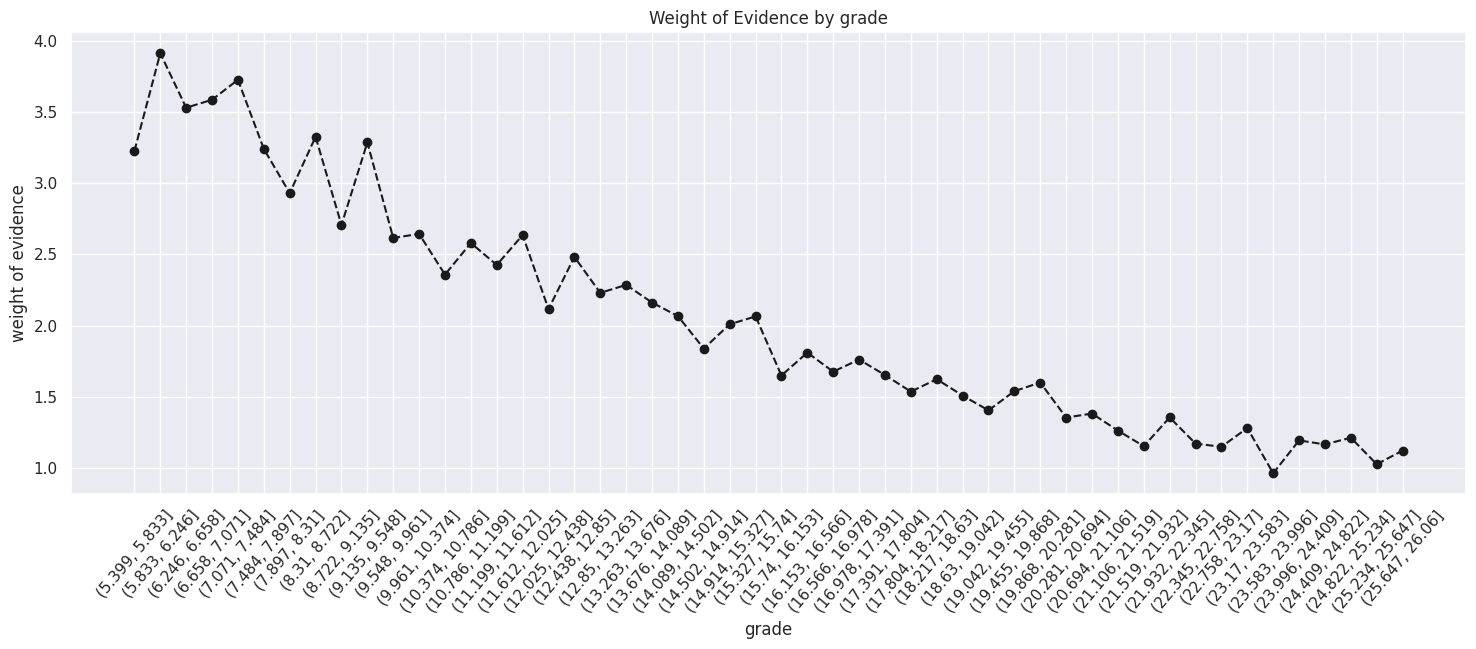

In [337]:
#plot the woe plot
plot_by_woe(df_cont3,50)

In [338]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)



# **We will be repeating the similar steps for all continuous variables:**

**1.Apply the cut function if unique values are many**

**2.apply the woe_continuos function**

**3.plot the woe_plot**

**4.Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other**

In [339]:
#prepossing of 'funded_amt_factor'

df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_cont4=woe_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_cont4

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.000349,2.256722,NaN,NaN,0.743424
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.000876,2.241294,0.001332,0.015427,0.743424
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.001923,2.130353,0.010078,0.110941,0.743424
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.002420,2.081305,0.004746,0.049048,0.743424
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.001550,2.107208,0.002529,0.025902,0.743424
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.002962,2.100434,0.000656,0.006774,0.743424
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.005162,2.112983,0.001213,0.012549,0.743424
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.004873,2.266551,0.013910,0.153568,0.743424
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.002339,2.066651,0.018449,0.199900,0.743424
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.003624,2.175393,0.010399,0.108742,0.743424


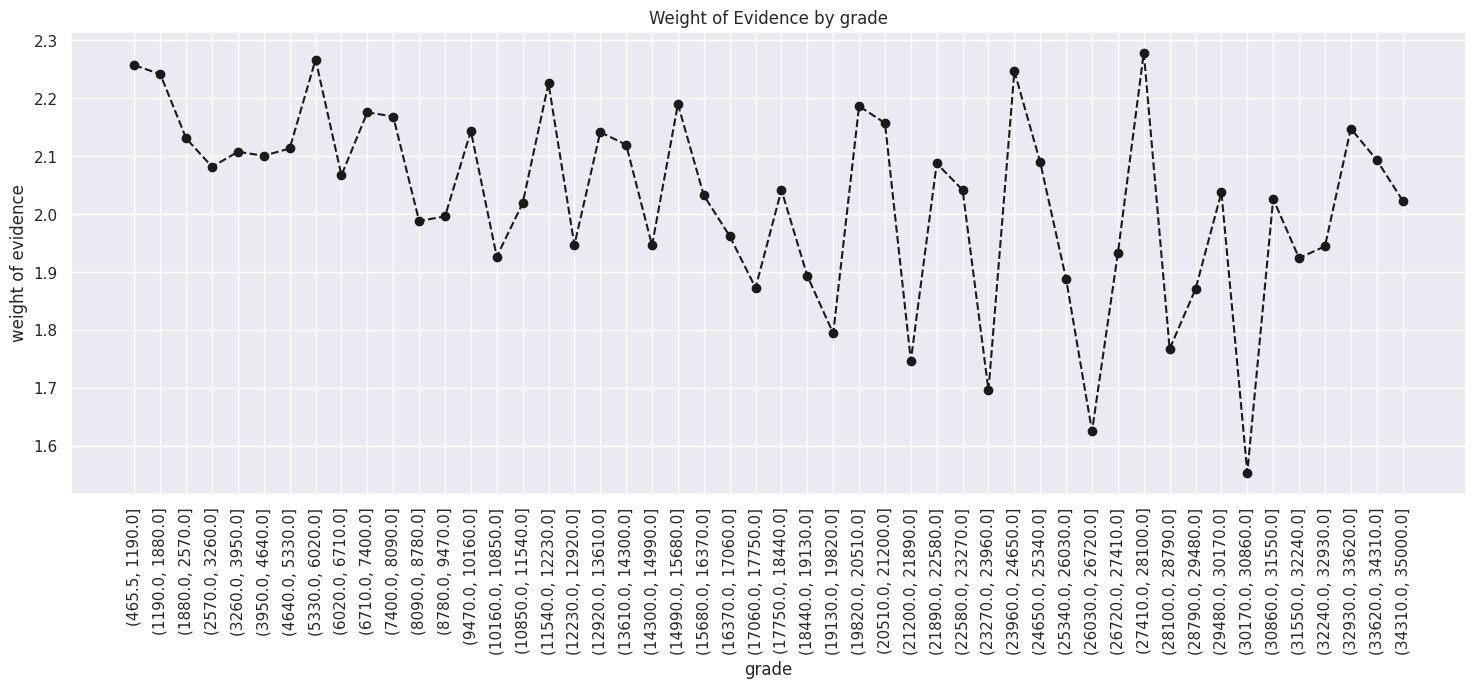

In [340]:
#plot the woe_plot
plot_by_woe(df_cont4,90)

In [341]:
#convert the 'mths_since_earliest_cr_line' to float
df_inputs_prepr['mths_since_earliest_cr_line']=df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)

In [342]:
#apply the cut function on 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)

In [343]:
#check the 'mths_since_earliest_cr_line_factor'
df_inputs_prepr['mths_since_earliest_cr_line']

427211    396.0
206088    264.0
136020    341.0
412305    254.0
36159     257.0
          ...  
259178    294.0
365838    193.0
131932    183.0
146867    275.0
121958    398.0
Name: mths_since_earliest_cr_line, Length: 373028, dtype: float64

In [344]:
#apply the woe_continuos function
df_cont5=woe_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor',df_targets_prepr)

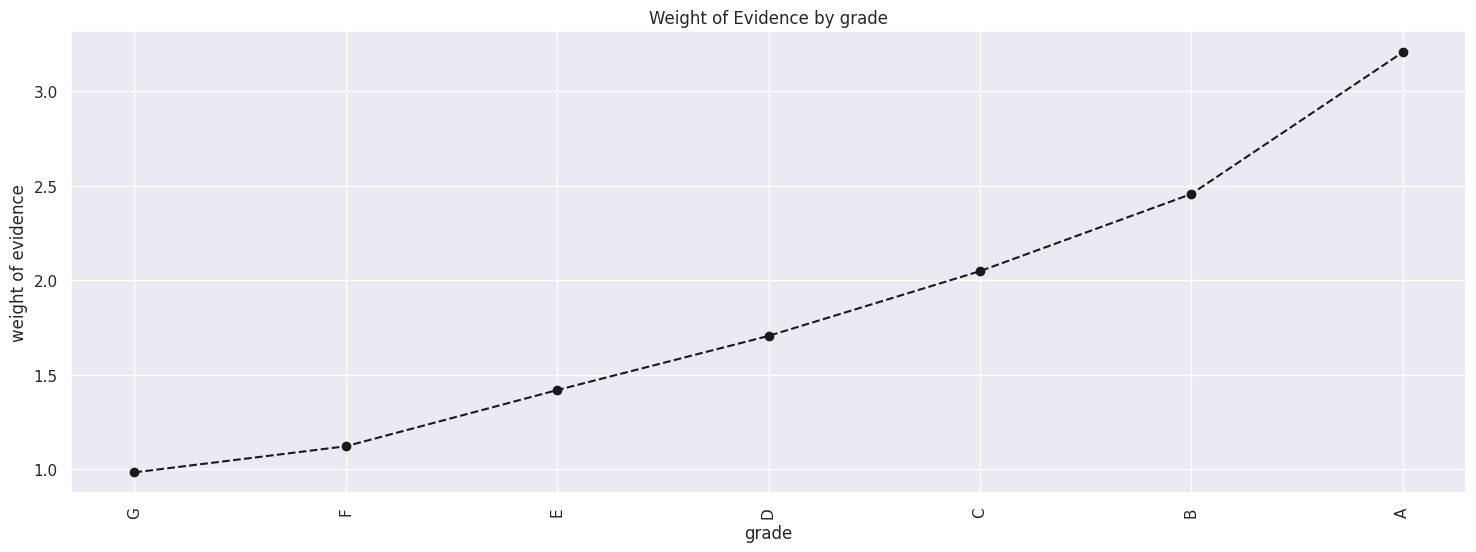

In [345]:
#plot the woe_plot
plot_by_woe(df_temp,90)

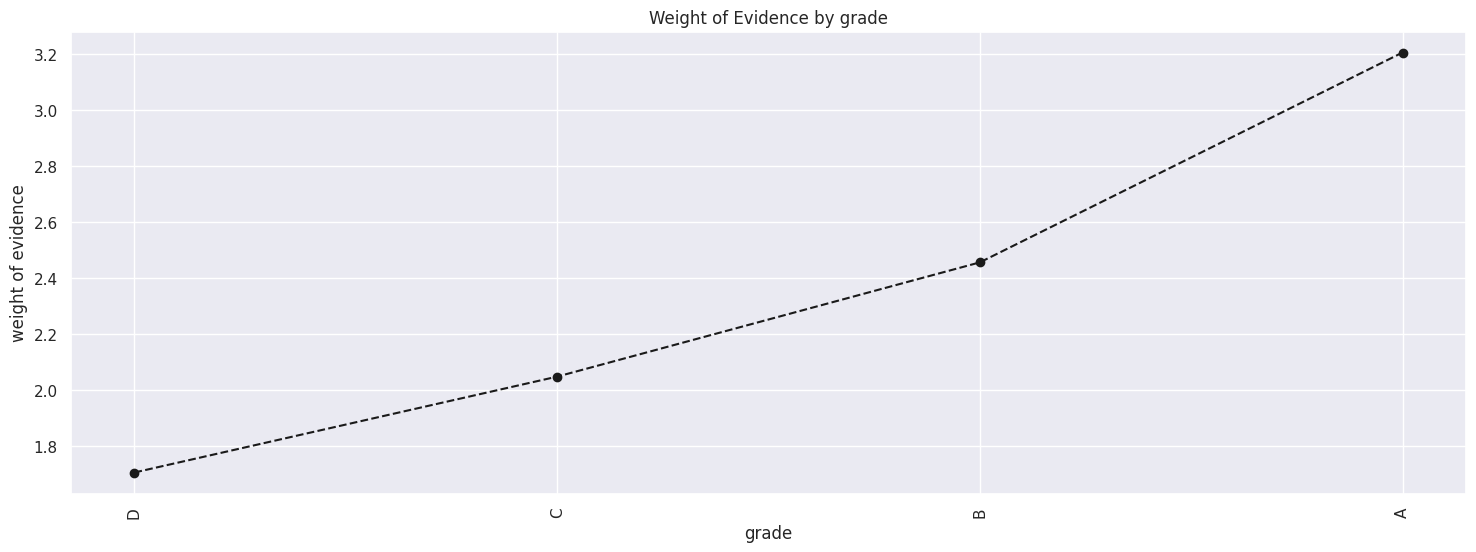

In [346]:
#plot for df_temp.iloc[3:,:],90
plot_by_woe(df_temp.iloc[3:,:],90)

In [347]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['mths_since_earliest_cr_line:<140']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,240)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(240,340)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(340,440)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(440,540)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(540,600)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:>600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(600,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [348]:
#check the 'installment' unique values
df_inputs_prepr['installment'].unique()

array([762.08, 343.39, 648.56, ..., 718.44, 735.11, 464.48])

In [349]:
#apply the cut function and woe_continuos function on 'installment'
df_inputs_prepr['installment_factor']=pd.cut(df_inputs_prepr['installment'],50)
df_cont6=woe_continuous(df_inputs_prepr,'installment_factor',df_targets_prepr)
df_cont6

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.000512,2.267872,NaN,NaN,0.743389
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.001493,2.170205,0.008639,0.097667,0.743389
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.002197,2.122015,0.004517,0.048190,0.743389
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.003016,2.094301,0.002677,0.027715,0.743389
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.003127,2.159077,0.006166,0.064776,0.743389
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.005354,2.134462,0.002306,0.024615,0.743389
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.004933,2.251709,0.010590,0.117247,0.743389
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.004524,2.201650,0.004400,0.050059,0.743389
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.005592,2.212771,0.000993,0.011121,0.743389
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.006588,2.101970,0.010296,0.110801,0.743389


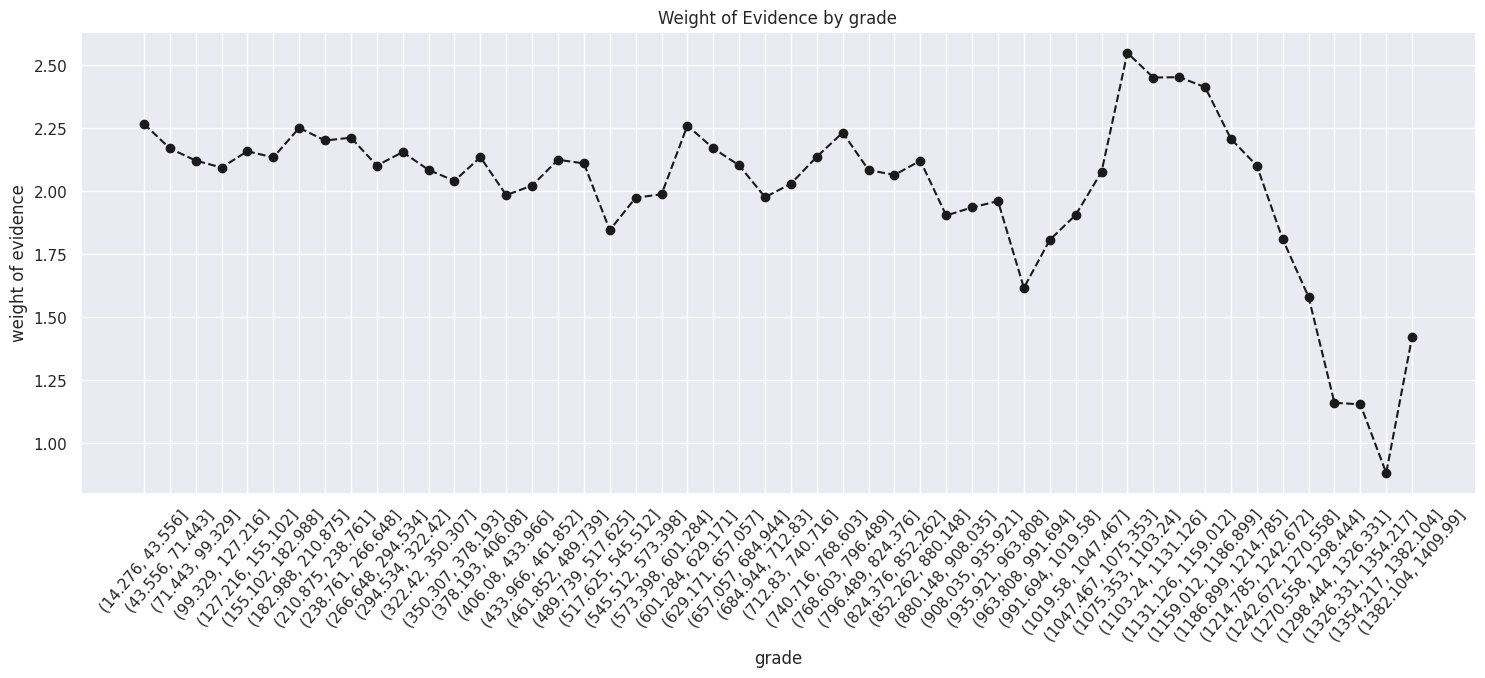

In [350]:
#plot the woe_plot
plot_by_woe(df_cont6,50)

In [351]:
#check the 'deling_2yrs' column
df_inputs_prepr['delinq_2yrs']=df_inputs_prepr['delinq_2yrs'].astype(float)

In [352]:
#apply the cut function
df_inputs_prepr['delinq_2yrs_factors']=pd.cut(df_inputs_prepr['delinq_2yrs'],50)

In [353]:
#apply the woe_continuos function
df_cont7=woe_continuous(df_inputs_prepr,'delinq_2yrs',df_targets_prepr)
df_cont7

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.100987,2.095847,NaN,NaN,0.742551
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.014435,2.124367,0.002750,0.028520,0.742551
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.004382,2.080643,0.004242,0.043724,0.742551
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.001598,2.024026,0.005711,0.056616,0.742551
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.000569,2.184207,0.015526,0.160180,0.742551
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.000343,2.011388,0.016835,0.172819,0.742551
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.000147,2.221862,0.020208,0.210474,0.742551
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000117,1.817077,0.041981,0.404785,0.742551
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000042,2.258782,0.045190,0.441705,0.742551
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000030,2.066863,0.017765,0.191920,0.742551


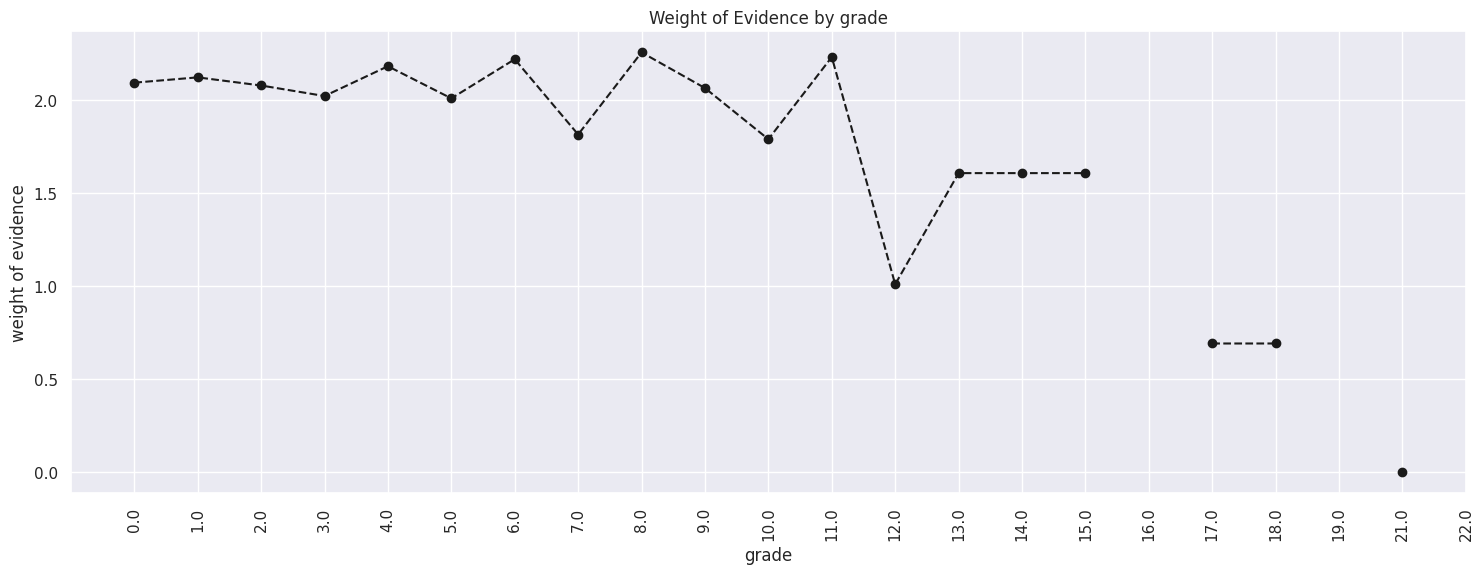

In [354]:
#plot the woe_plot
plot_by_woe(df_cont7,90)

In [355]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['delinq_2yrs:0']=np.where((df_inputs_prepr['delinq_2yrs']==0.0),1,0)
df_inputs_prepr['delinq_2yrs:0-3']=np.where((df_inputs_prepr['delinq_2yrs']>0.0)&(df_inputs_prepr['delinq_2yrs']<=3),1,0)
df_inputs_prepr['delinq_2yrs:3-7']=np.where((df_inputs_prepr['delinq_2yrs']>3)&(df_inputs_prepr['delinq_2yrs']<=7),1,0)
df_inputs_prepr['delinq_2yrs:7-9']=np.where((df_inputs_prepr['delinq_2yrs']>7)&(df_inputs_prepr['delinq_2yrs']<=9),1,0)
df_inputs_prepr['delinq_2yrs:9-11']=np.where((df_inputs_prepr['delinq_2yrs']>9)&(df_inputs_prepr['delinq_2yrs']<=11),1,0)
df_inputs_prepr['delinq_2yrs:11-12']=np.where((df_inputs_prepr['delinq_2yrs']>11)&(df_inputs_prepr['delinq_2yrs']<=12),1,0)
df_inputs_prepr['delinq_2yrs:12-18']=np.where((df_inputs_prepr['delinq_2yrs']>12)&(df_inputs_prepr['delinq_2yrs']<=18),1,0)
df_inputs_prepr['delinq_2yrs:>18']=np.where((df_inputs_prepr['delinq_2yrs']>18),1,0)

In [356]:
#check the 'inq_last_6mths' column
df_inputs_prepr['inq_last_6mths']=df_inputs_prepr['inq_last_6mths'].astype(float)
df_inputs_prepr['inq_last_6mths'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [357]:
#apply the woe_continuos function
df_cont8=woe_continuous(df_inputs_prepr,'inq_last_6mths',df_targets_prepr)
df_cont8

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.053276,2.294195,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.036069,2.040160,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.018889,1.850595,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.009670,1.655780,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.002652,1.721834,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.001168,1.550519,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.000623,1.313672,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.000153,0.750306,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000108,0.590868,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000042,0.728239,0.030854,0.137370,inf


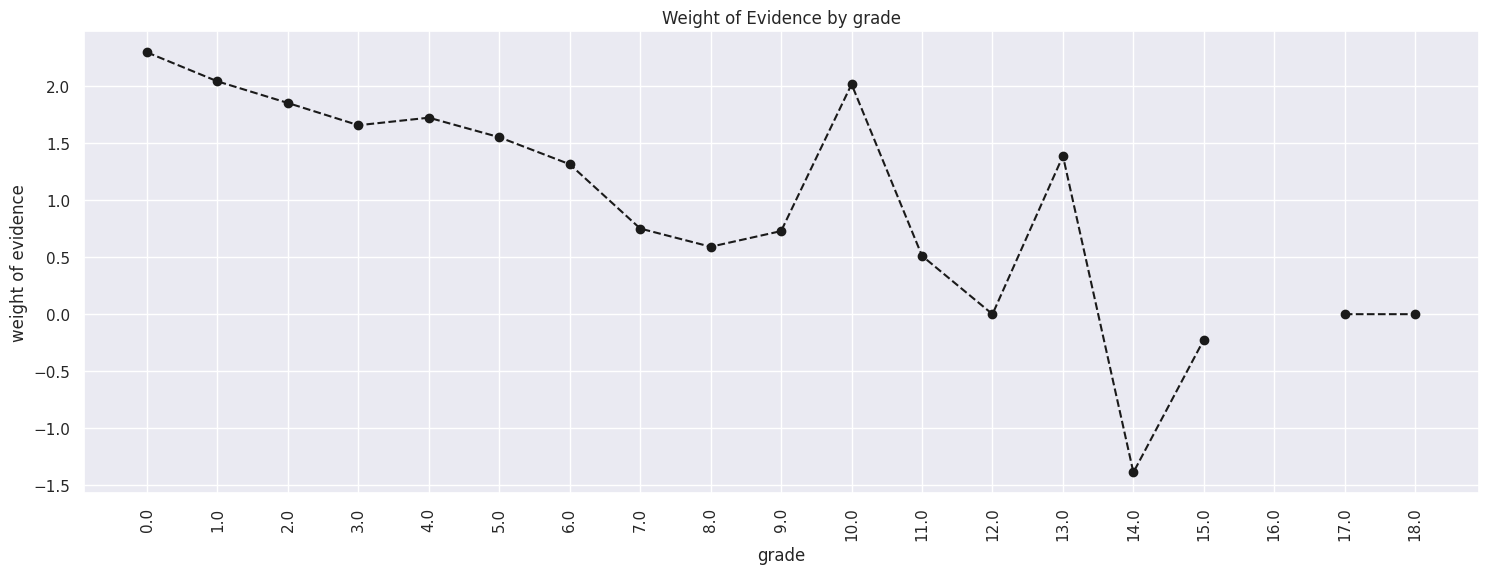

In [358]:
#plot the woe_plot
plot_by_woe(df_cont8,90)

In [359]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['inq_last_6mths:0']=np.where((df_inputs_prepr['inq_last_6mths']>=0.0),1,0)
df_inputs_prepr['inq_last_6mths:0-3']=np.where((df_inputs_prepr['inq_last_6mths']>0.0)&(df_inputs_prepr['inq_last_6mths']<=3),1,0)
df_inputs_prepr['inq_last_6mths:3-7']=np.where((df_inputs_prepr['inq_last_6mths']>3)&(df_inputs_prepr['inq_last_6mths']<=7),1,0)
df_inputs_prepr['inq_last_6mths:7-9']=np.where((df_inputs_prepr['inq_last_6mths']>7)&(df_inputs_prepr['inq_last_6mths']<=9),1,0)
df_inputs_prepr['inq_last_6mths:9-11']=np.where((df_inputs_prepr['inq_last_6mths']>9)&(df_inputs_prepr['inq_last_6mths']<=11),1,0)
df_inputs_prepr['inq_last_6mths:11-12']=np.where((df_inputs_prepr['inq_last_6mths']>11)&(df_inputs_prepr['inq_last_6mths']<=12),1,0)
df_inputs_prepr['inq_last_6mths:12-18']=np.where((df_inputs_prepr['inq_last_6mths']>12)&(df_inputs_prepr['inq_last_6mths']<=18),1,0)
df_inputs_prepr['inq_last_6mths:18']=np.where((df_inputs_prepr['inq_last_6mths']>18),0,1)

In [360]:
#convert the 'open_acc' into float and then apply the woe_continuos function

df_inputs_prepr['open_acc']=df_inputs_prepr['open_acc'].astype(float)
df_cont9=woe_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)
df_cont9

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000021,1.145132,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000042,1.925291,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.000677,1.699482,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.001664,1.933956,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.003275,2.106194,0.017817,0.172239,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.005610,2.103624,0.000249,0.002571,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.007976,2.115164,0.001113,0.011540,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.009848,2.106613,0.000824,0.008550,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.011013,2.101337,0.000511,0.005276,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.011756,2.082541,0.001838,0.018796,inf


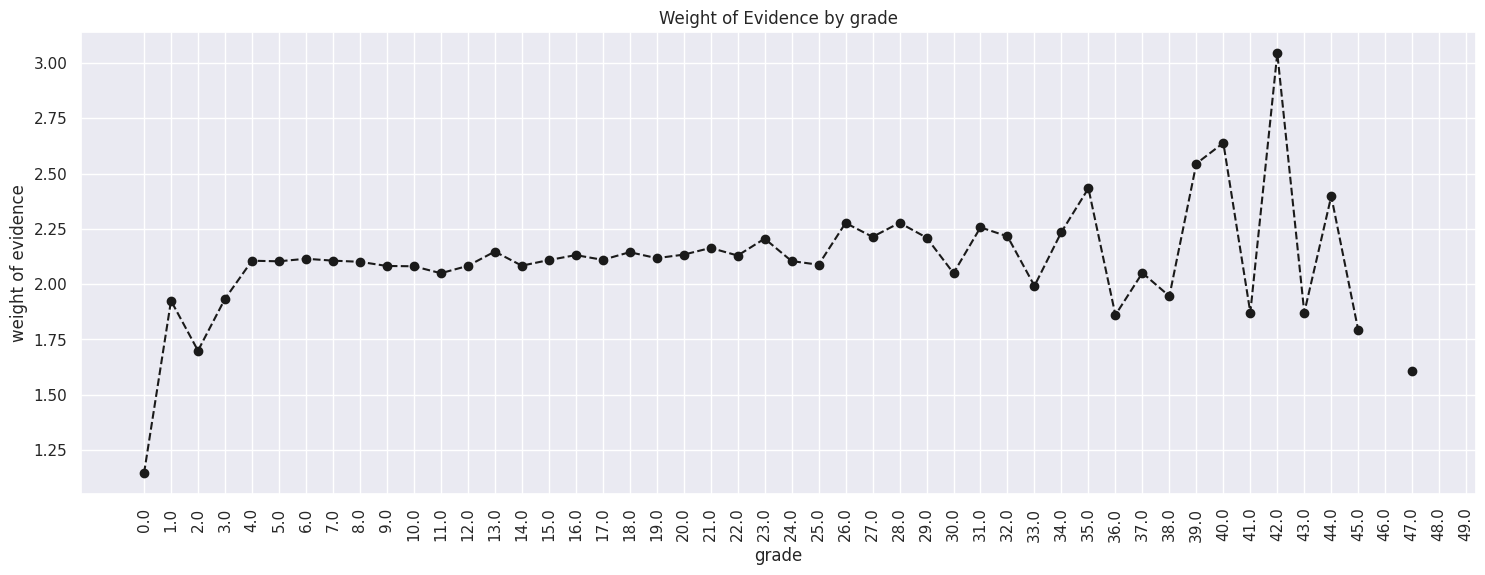

In [361]:
#plot the woe_plot
plot_by_woe(df_cont9,90)

In [362]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['open_acc:=0']=np.where((df_inputs_prepr['open_acc']==0.0),1,0)
df_inputs_prepr['open_acc:0-1']=np.where((df_inputs_prepr['open_acc']>0.0)&(df_inputs_prepr['open_acc']<=1),1,0)
df_inputs_prepr['open_acc:1-4']=np.where((df_inputs_prepr['open_acc']>1)&(df_inputs_prepr['open_acc']<=4),1,0)
df_inputs_prepr['open_acc:4-28']=np.where((df_inputs_prepr['open_acc']>4)&(df_inputs_prepr['open_acc']<=28),1,0)
df_inputs_prepr['open_acc:28-35']=np.where((df_inputs_prepr['open_acc']>28)&(df_inputs_prepr['open_acc']<=35),1,0)
df_inputs_prepr['open_acc:35-45']=np.where((df_inputs_prepr['open_acc']>35)&(df_inputs_prepr['open_acc']<=45),1,0)
df_inputs_prepr['open_acc:>45']=np.where((df_inputs_prepr['open_acc']>45),1,0)

In [363]:
df_inputs_prepr['pub_rec'].unique()

array([0.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, '0', 7.0, 9.0, 10.0, 13.0, 8.0,
       19.0, 11.0, 17.0, 34.0, 16.0, 12.0, 40.0, 18.0, 54.0, 15.0, 63.0,
       21.0], dtype=object)

In [364]:
#convert the 'pub_rec' into float
df_inputs_prepr['pub_rec']=df_inputs_prepr['pub_rec'].astype(float)
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4.,  6.,  7.,  9., 10., 13.,  8., 19.,
       11., 17., 34., 16., 12., 40., 18., 54., 15., 63., 21.])

In [365]:
#apply the woe_continuos function
df_cont10=woe_continuous(df_inputs_prepr,'pub_rec',df_targets_prepr)
df_cont10

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.107326,2.090139,NaN,NaN,0.742466
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.013595,2.126153,0.003478,0.036014,0.742466
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.001318,2.233837,0.009828,0.107684,0.742466
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.000307,2.446601,0.017065,0.212764,0.742466
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000093,2.498258,0.003707,0.051657,0.742466
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000054,2.329984,0.012690,0.168274,0.742466
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000024,2.611906,0.020294,0.281922,0.742466
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000006,3.135494,0.026709,0.523588,0.742466
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,0.742466
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000009,1.299283,0.214286,inf,0.742466


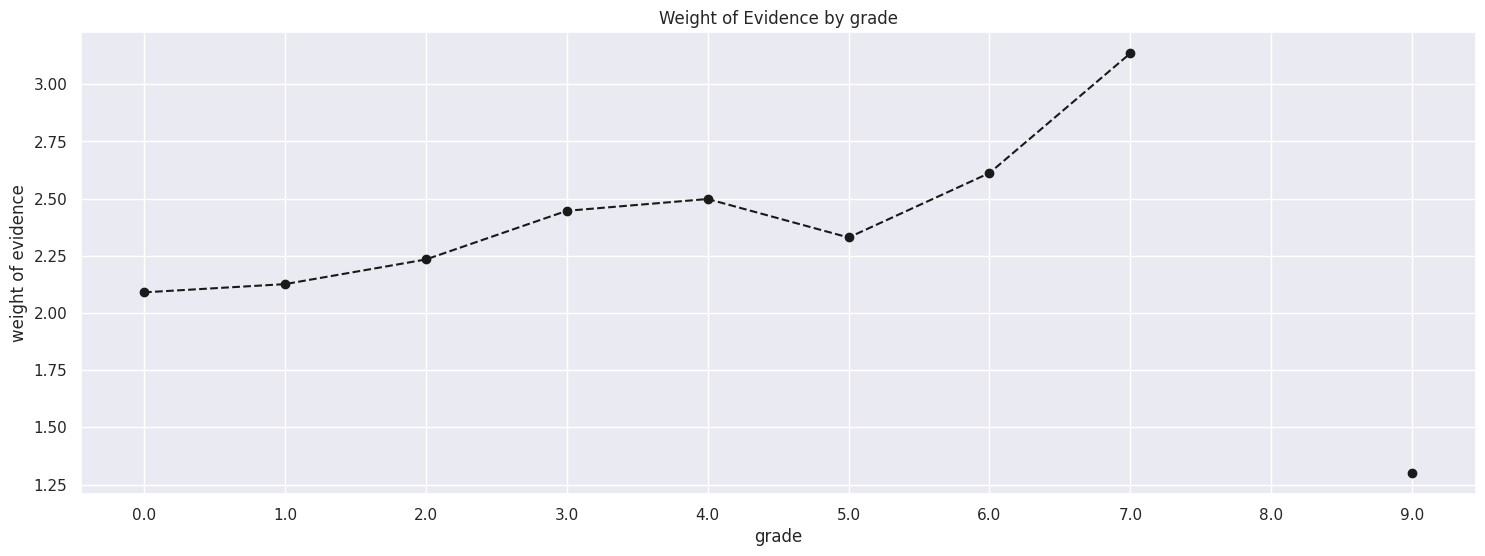

In [366]:
#plot the woe_plot
plot_by_woe(df_cont10)

In [367]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['pub_rec:0-3']=np.where((df_inputs_prepr['pub_rec']>0)&(df_inputs_prepr['pub_rec']<=3),1,0)
df_inputs_prepr['pub_rec:3-6']=np.where((df_inputs_prepr['pub_rec']>3)&(df_inputs_prepr['pub_rec']<=6),1,0)
df_inputs_prepr['pub_rec:6-8']=np.where((df_inputs_prepr['pub_rec']>6)&(df_inputs_prepr['pub_rec']<=8),1,0)
df_inputs_prepr['pub_rec:8']=np.where((df_inputs_prepr['pub_rec']>8),0,1)

In [368]:
#convert the 'total_acc' into float
df_inputs_prepr['total_acc'].unique()

array([32.0, 38.0, 20.0, 13.0, 30.0, 26.0, 6.0, 21.0, 36.0, 48.0, 25.0,
       33.0, 27.0, 23.0, 44.0, 9.0, 10.0, 18.0, 31.0, 5.0, 19.0, 15.0,
       39.0, 12.0, 57.0, 24.0, 22.0, 17.0, 16.0, 42.0, 7.0, 29.0, 28.0,
       34.0, 43.0, 63.0, 14.0, 11.0, 40.0, 37.0, 41.0, 45.0, 35.0, 49.0,
       54.0, 52.0, 53.0, 60.0, 56.0, 4.0, 8.0, 47.0, 51.0, 46.0, 61.0,
       59.0, 50.0, 58.0, '0', 64.0, 3.0, 55.0, 62.0, 2.0, 1.0, 71.0,
       105.0, 66.0, 68.0, 69.0, 67.0, 80.0, 70.0, 65.0, 75.0, 85.0, 93.0,
       83.0, 73.0, 78.0, 81.0, 74.0, 84.0, 77.0, 89.0, 87.0, 72.0, 76.0,
       117.0, 90.0, 95.0, 79.0, 91.0, 121.0, 119.0, 100.0, 118.0, 86.0,
       102.0, 82.0, 96.0, 92.0, 116.0, 94.0, 98.0, 88.0, 150.0, 106.0,
       124.0, 97.0, 101.0, 99.0], dtype=object)

In [369]:
#apply the cut function to create buckets of continuos variables
df_inputs_prepr['total_acc']=df_inputs_prepr['total_acc'].astype(float)
df_inputs_prepr['total_acc_fac']=pd.cut(df_inputs_prepr['total_acc'],50)

In [370]:
#apply the woe_continuos function
df_cont11=woe_continuous(df_inputs_prepr,'total_acc_fac',df_targets_prepr)
df_cont11

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.000262,1.452986,NaN,NaN,0.743002
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.002444,1.855374,0.054299,0.402388,0.743002
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.005746,1.928929,0.008374,0.073555,0.743002
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.008993,2.004632,0.008152,0.075703,0.743002
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.012024,2.004621,0.000001,0.000011,0.743002
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.013135,2.063126,0.005986,0.058505,0.743002
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.013911,2.052052,0.001112,0.011073,0.743002
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.013117,2.106074,0.005337,0.054022,0.743002
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.011419,2.147573,0.003950,0.041499,0.743002
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.009649,2.187298,0.003661,0.039725,0.743002


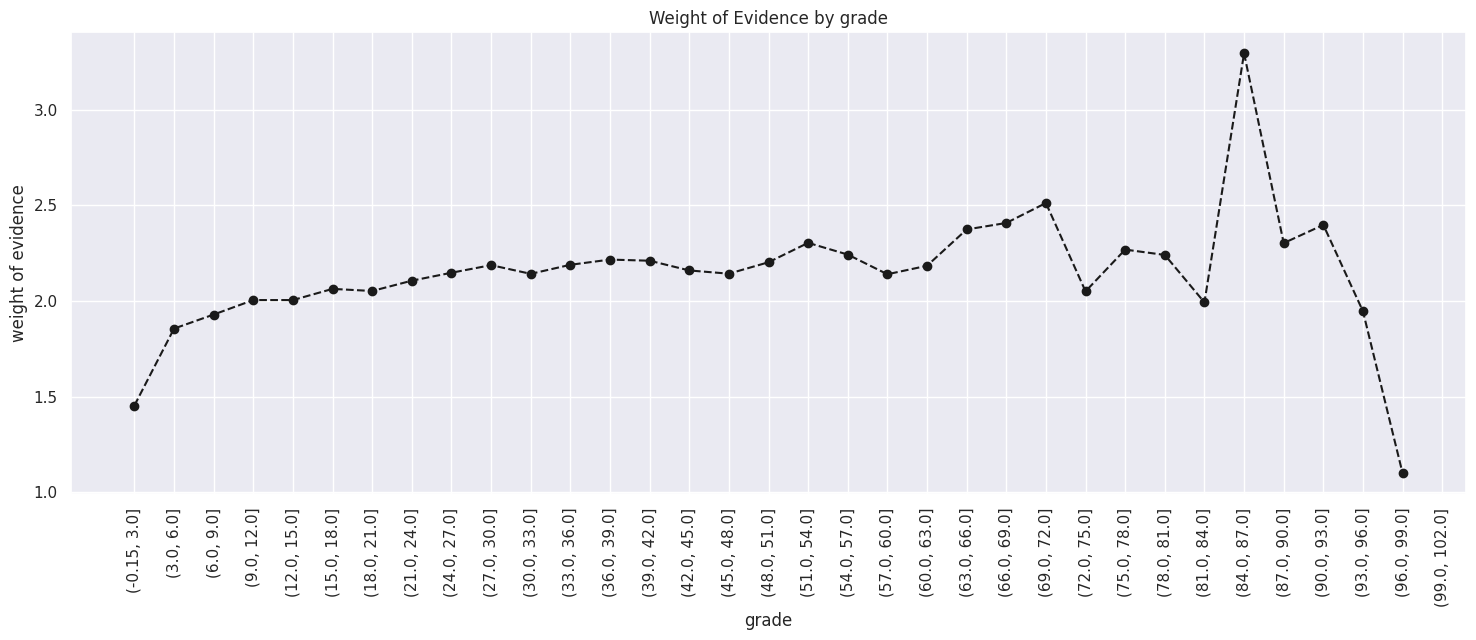

In [371]:
#plot the woe_plot
plot_by_woe(df_cont11,90)

In [372]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_acc:<0']=np.where((df_inputs_prepr['total_acc']<0.0),1,0)
df_inputs_prepr['total_acc:0-4']=np.where((df_inputs_prepr['total_acc']>0.0)&(df_inputs_prepr['total_acc']<=4),1,0)
df_inputs_prepr['total_acc:4-62']=np.where((df_inputs_prepr['total_acc']>4)&(df_inputs_prepr['total_acc']<=62),1,0)
df_inputs_prepr['total_acc:62-72']=np.where((df_inputs_prepr['total_acc']>62)&(df_inputs_prepr['total_acc']<=72),1,0)
df_inputs_prepr['total_acc:72-85']=np.where((df_inputs_prepr['total_acc']>72)&(df_inputs_prepr['total_acc']<=85),1,0)
df_inputs_prepr['total_acc:>85']=np.where((df_inputs_prepr['total_acc']>85),0,1)

In [373]:
#convert the 'acc_now_delinq' into float type
df_inputs_prepr['acc_now_delinq']=df_inputs_prepr['acc_now_delinq'].astype(float)
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4., 5.])

In [374]:
#apply the woe_continuos function
df_cont12=woe_continuous(df_inputs_prepr,'acc_now_delinq',df_targets_prepr)
df_cont12

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.122330,2.097382,NaN,NaN,0.742535
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.000382,2.191082,0.008797,0.093700,0.742535
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000015,2.564949,0.029126,0.373868,0.742535
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000003,1.791759,0.071429,0.773190,0.742535
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,0.742535
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000003,0.000000,0.500000,inf,0.742535


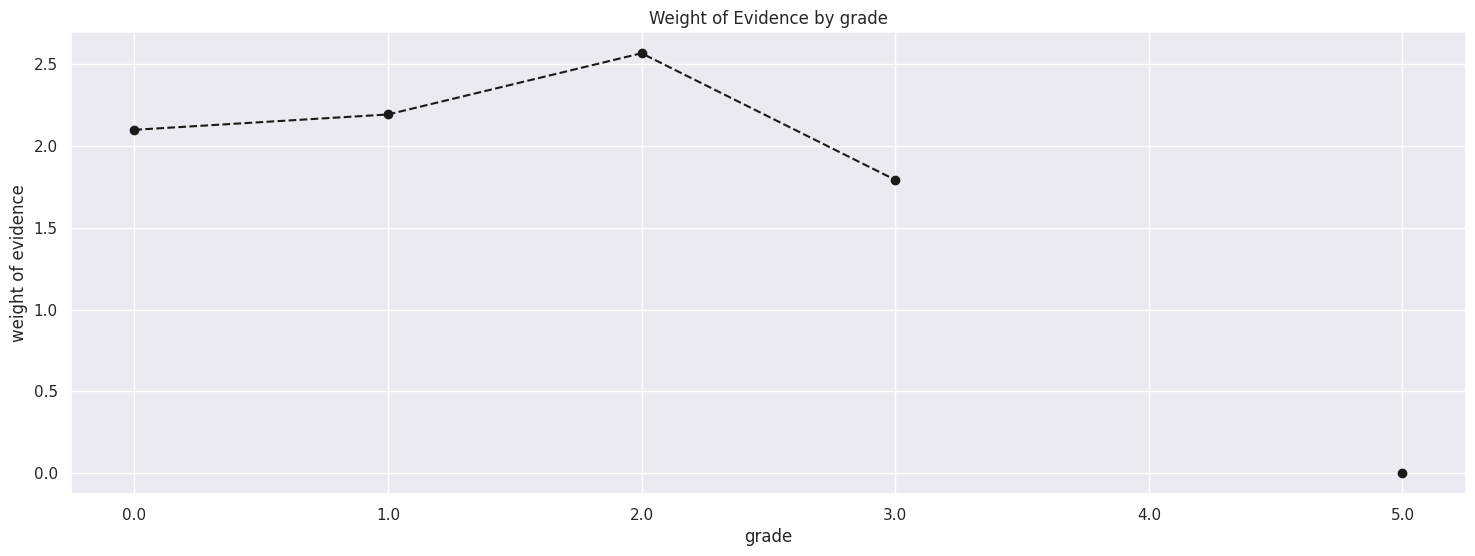

In [375]:
#plot the woe_plot
plot_by_woe(df_cont12)

In [376]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['acc_now_delinq:<0']=np.where((df_inputs_prepr['acc_now_delinq']<0),0,1)
df_inputs_prepr['acc_now_delinq:0-1']=np.where((df_inputs_prepr['acc_now_delinq']>0)&(df_inputs_prepr['acc_now_delinq']<=1),1,0)
df_inputs_prepr['acc_now_delinq:1-2']=np.where((df_inputs_prepr['acc_now_delinq']>1)&(df_inputs_prepr['acc_now_delinq']<=2),1,0)
df_inputs_prepr['acc_now_delinq:2-3']=np.where((df_inputs_prepr['acc_now_delinq']>2)&(df_inputs_prepr['acc_now_delinq']<=3),1,0)
df_inputs_prepr['acc_now_delinq:3-5']=np.where((df_inputs_prepr['acc_now_delinq']>3)&(df_inputs_prepr['acc_now_delinq']<=5),1,0)
df_inputs_prepr['acc_now_delinq:>5']=np.where((df_inputs_prepr['acc_now_delinq']>3)&(df_inputs_prepr['acc_now_delinq']>5),0,1)

In [377]:
#For 'total_rev_hi_lim' column take only those values which are less than 80000

df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim']<= 80000,:]

In [378]:
#apply the cut and woe_continuos function
df_inputs_prepr['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
df_cont13=woe_continuous(df_inputs_prepr,'total_rev_hi_lim_factor',df_targets_prepr)
df_cont13

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-80.0, 1600.0]",2111,0.852676,0.005885,1800.0,311.0,0.005647,0.000976,1.755749,NaN,NaN,0.741624
1,"(1600.0, 3200.0]",6628,0.860742,0.018477,5705.0,923.0,0.017897,0.002896,1.821469,0.008066,0.065720,0.741624
2,"(3200.0, 4800.0]",10146,0.872068,0.028284,8848.0,1298.0,0.027757,0.004072,1.919367,0.011326,0.097898,0.741624
3,"(4800.0, 6400.0]",16177,0.870681,0.045097,14085.0,2092.0,0.044186,0.006563,1.906990,0.001387,0.012377,0.741624
4,"(6400.0, 8000.0]",17741,0.877684,0.049457,15571.0,2170.0,0.048848,0.006808,1.970683,0.007004,0.063693,0.741624
5,"(8000.0, 9600.0]",16342,0.879696,0.045557,14376.0,1966.0,0.045099,0.006168,1.989559,0.002012,0.018876,0.741624
6,"(9600.0, 11200.0]",20261,0.876709,0.056482,17763.0,2498.0,0.055724,0.007836,1.961627,0.002988,0.027932,0.741624
7,"(11200.0, 12800.0]",19579,0.881352,0.054581,17256.0,2323.0,0.054134,0.007287,2.005300,0.004644,0.043673,0.741624
8,"(12800.0, 14400.0]",17424,0.882978,0.048573,15385.0,2039.0,0.048264,0.006397,2.020934,0.001625,0.015633,0.741624
9,"(14400.0, 16000.0]",19636,0.872021,0.054740,17123.0,2513.0,0.053717,0.007884,1.918945,0.010957,0.101988,0.741624


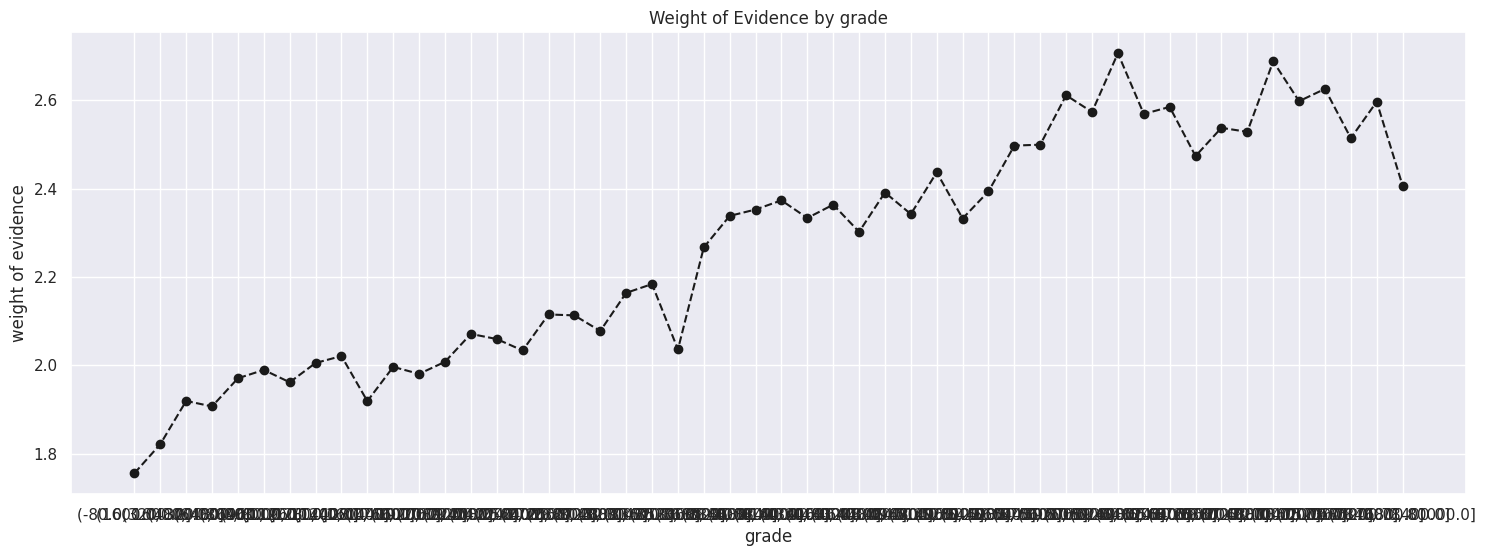

In [379]:
#plot the woe_plot
plot_by_woe(df_cont13)

In [380]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_rev_hi_lim:<=5k']=np.where((df_inputs_prepr['total_rev_hi_lim']<=5000),1,0)
df_inputs_prepr['total_rev_hi_lim:5k_10k']=np.where((df_inputs_prepr['total_rev_hi_lim']>5000)&(df_inputs_prepr['total_rev_hi_lim']<=10000),1,0)
df_inputs_prepr['total_rev_hi_lim:10k_20k']=np.where((df_inputs_prepr['total_rev_hi_lim']>10000)&(df_inputs_prepr['total_rev_hi_lim']<=20000),1,0)
df_inputs_prepr['total_rev_hi_lim:20k_30k']=np.where((df_inputs_prepr['total_rev_hi_lim']>20000)&(df_inputs_prepr['total_rev_hi_lim']<=30000),1,0)
df_inputs_prepr['total_rev_hi_lim:30k_40k']=np.where((df_inputs_prepr['total_rev_hi_lim']>30000)&(df_inputs_prepr['total_rev_hi_lim']<=40000),1,0)
df_inputs_prepr['total_rev_hi_lim:40k_50k']=np.where((df_inputs_prepr['total_rev_hi_lim']>40000)&(df_inputs_prepr['total_rev_hi_lim']<=50000),1,0)
df_inputs_prepr['total_rev_hi_lim:50k_65k']=np.where((df_inputs_prepr['total_rev_hi_lim']>50000)&(df_inputs_prepr['total_rev_hi_lim']<=65000),1,0)
df_inputs_prepr['total_rev_hi_lim:65k_80k']=np.where((df_inputs_prepr['total_rev_hi_lim']>65000)&(df_inputs_prepr['total_rev_hi_lim']<=80000),1,0)
df_inputs_prepr['total_rev_hi_lim:>80k']=np.where((df_inputs_prepr['total_rev_hi_lim']>65000),1,0)


In [381]:
#apply the cut and woe_contionus function on 'annual_inc'

df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_cont14=woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_cont14

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 73294.82]",231445,0.875901,0.620449,202723.0,28722.0,0.610152,0.086447,1.954177,NaN,NaN,0.744817
1,"(73294.82, 144693.64]",120459,0.912900,0.322922,109967.0,10492.0,0.330977,0.031579,2.349567,0.036998,0.395390,0.744817
2,"(144693.64, 216092.46]",15885,0.925087,0.042584,14695.0,1190.0,0.044229,0.003582,2.513554,0.012187,0.163987,0.744817
3,"(216092.46, 287491.28]",3119,0.927220,0.008361,2892.0,227.0,0.008704,0.000683,2.544754,0.002134,0.031200,0.744817
4,"(287491.28, 358890.1]",1117,0.929275,0.002994,1038.0,79.0,0.003124,0.000238,2.575603,0.002055,0.030850,0.744817
5,"(358890.1, 430288.92]",408,0.933824,0.001094,381.0,27.0,0.001147,0.000081,2.646963,0.004549,0.071359,0.744817
6,"(430288.92, 501687.74]",245,0.946939,0.000657,232.0,13.0,0.000698,0.000039,2.881788,0.013115,0.234826,0.744817
7,"(501687.74, 573086.56]",87,0.919540,0.000233,80.0,7.0,0.000241,0.000021,2.436116,0.027399,0.445672,0.744817
8,"(573086.56, 644485.38]",61,0.868852,0.000164,53.0,8.0,0.000160,0.000024,1.890850,0.050688,0.545266,0.744817
9,"(644485.38, 715884.2]",51,0.901961,0.000137,46.0,5.0,0.000138,0.000015,2.219203,0.033108,0.328353,0.744817


As we can see higher values in annual_inc has very less observation so we will take only those annual income which are less than 140000

In [382]:
#take only those observations which are less than 140000
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<= 140000,:]

In [383]:
#apply the cut and woe_contionus function on 'annual_inc'
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_cont14=woe_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr)
df_cont14

<ipython-input-383-bb04dd013435>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000010,1.386294,NaN,NaN,0.742643
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000032,1.098612,0.050000,0.287682,0.742643
2,"(7420.16, 10182.24]",287,0.874564,0.000818,251.0,36.0,0.000805,0.000115,1.941934,0.124564,0.843322,0.742643
3,"(10182.24, 12944.32]",547,0.828154,0.001558,453.0,94.0,0.001452,0.000301,1.572597,0.046411,0.369337,0.742643
4,"(12944.32, 15706.4]",1210,0.830579,0.003447,1005.0,205.0,0.003222,0.000657,1.589733,0.002425,0.017135,0.742643
5,"(15706.4, 18468.48]",1522,0.847569,0.004335,1290.0,232.0,0.004136,0.000744,1.715660,0.016990,0.125927,0.742643
6,"(18468.48, 21230.56]",2928,0.855533,0.008340,2505.0,423.0,0.008031,0.001356,1.778672,0.007964,0.063012,0.742643
7,"(21230.56, 23992.64]",2495,0.844489,0.007107,2107.0,388.0,0.006755,0.001244,1.692015,0.011044,0.086657,0.742643
8,"(23992.64, 26754.72]",7016,0.848632,0.019985,5954.0,1062.0,0.019088,0.003405,1.723909,0.004143,0.031894,0.742643
9,"(26754.72, 29516.8]",5643,0.857345,0.016074,4838.0,805.0,0.015510,0.002581,1.793414,0.008714,0.069505,0.742643


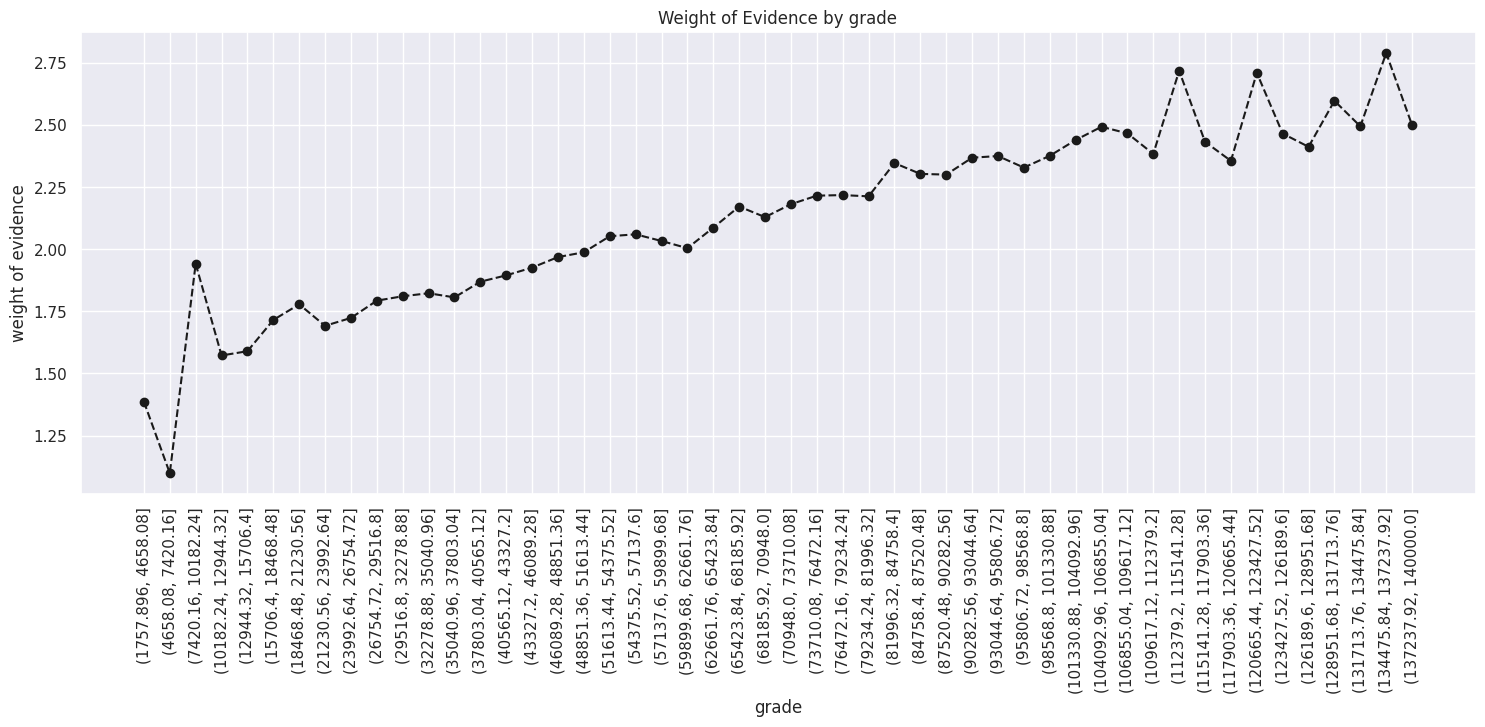

In [384]:
#plot the woe_plot
plot_by_woe(df_cont14,90)

In [385]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['annual_inc:<20k']=np.where((df_inputs_prepr['annual_inc']<=20000),1,0)
df_inputs_prepr['annual_inc:20k-30k']=np.where((df_inputs_prepr['annual_inc']>20000)&(df_inputs_prepr['annual_inc']<=30000),1,0)
df_inputs_prepr['annual_inc:30k-40k']=np.where((df_inputs_prepr['annual_inc']>30000)&(df_inputs_prepr['annual_inc']<=40000),1,0)
df_inputs_prepr['annual_inc:40k-50k']=np.where((df_inputs_prepr['annual_inc']>40000)&(df_inputs_prepr['annual_inc']<=50000),1,0)
df_inputs_prepr['annual_inc:50k-60k']=np.where((df_inputs_prepr['annual_inc']>50000)&(df_inputs_prepr['annual_inc']<=60000),1,0)
df_inputs_prepr['annual_inc:60k-70k']=np.where((df_inputs_prepr['annual_inc']>60000)&(df_inputs_prepr['annual_inc']<=70000),1,0)
df_inputs_prepr['annual_inc:70k-80k']=np.where((df_inputs_prepr['annual_inc']>70000)&(df_inputs_prepr['annual_inc']<=80000),1,0)
df_inputs_prepr['annual_inc:80k-90k']=np.where((df_inputs_prepr['annual_inc']>80000)&(df_inputs_prepr['annual_inc']<=90000),1,0)
df_inputs_prepr['annual_inc:90k-100k']=np.where((df_inputs_prepr['annual_inc']>90000)&(df_inputs_prepr['annual_inc']<=100000),1,0)
df_inputs_prepr['annual_inc:100k-120k']=np.where((df_inputs_prepr['annual_inc']>100000)&(df_inputs_prepr['annual_inc']<=120000),1,0)
df_inputs_prepr['annual_inc:120k-140k']=np.where((df_inputs_prepr['annual_inc']>120000)&(df_inputs_prepr['annual_inc']<=140000),1,0)
df_inputs_prepr['annual_inc:>140k']=np.where((df_inputs_prepr['annual_inc']>140000),1,0)

In [386]:
#'mths_since_last_delinq' has null values so take only the notnull values
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
#apply the cut and woe_continuos function on 'mths_since_last_delinq'
df_cont15=woe_continuous(df_inputs_prepr_temp,'mths_since_last_delinq_factor',df_targets_prepr)
df_cont15

<ipython-input-386-f4f33cb90824>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.004395,1.914447,NaN,NaN,0.745206
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.008136,2.066611,0.016097,0.152164,0.745206
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.009244,2.119983,0.005215,0.053372,0.745206
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.009523,2.079016,0.003983,0.040967,0.745206
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.006359,2.142163,0.006087,0.063147,0.745206
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.008097,2.118693,0.002227,0.023470,0.745206
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.007319,2.156755,0.003592,0.038062,0.745206
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.007183,2.143670,0.001223,0.013085,0.745206
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.004804,2.221811,0.007115,0.078141,0.745206
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.006515,2.168627,0.004794,0.053184,0.745206


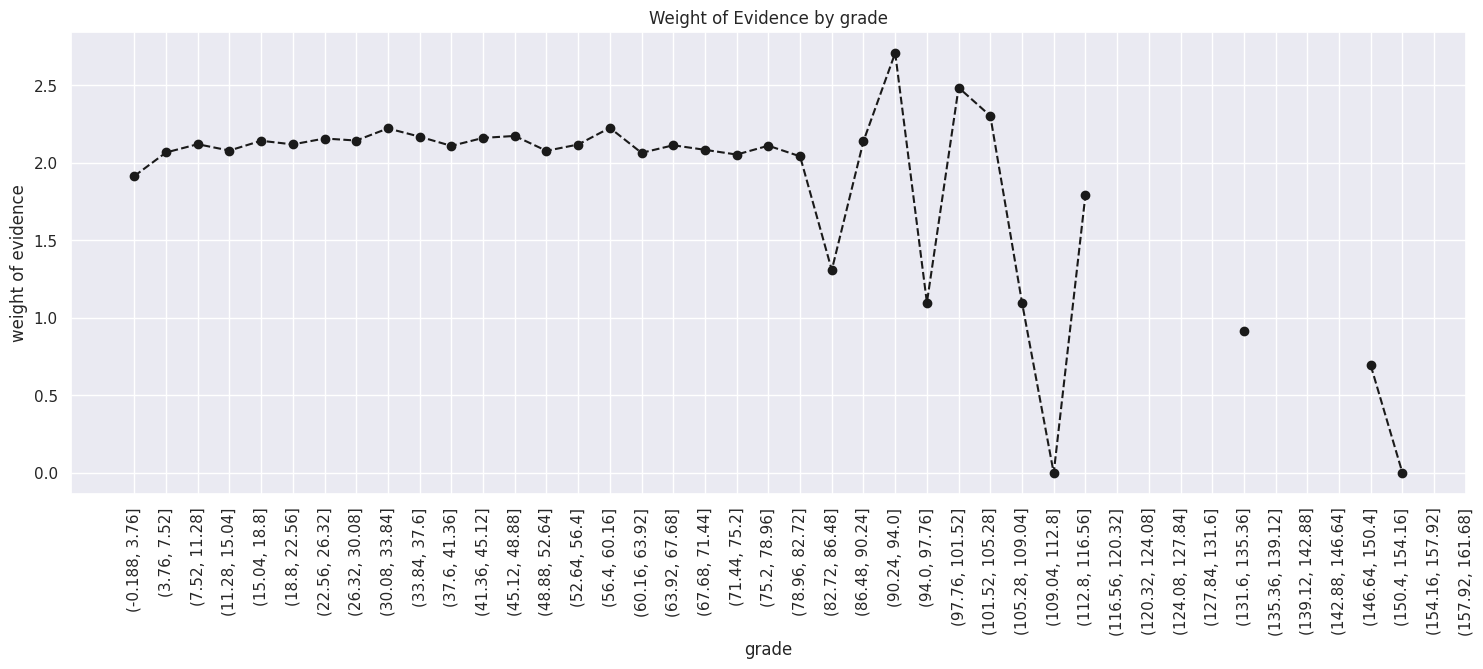

In [387]:
#plot the woe_plot
plot_by_woe(df_cont15,90)

In [388]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_last_delinq:Missing']=np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3']=np.where((df_inputs_prepr['mths_since_last_delinq']>=0)&(df_inputs_prepr['mths_since_last_delinq']<=3),1,0)
df_inputs_prepr['mths_since_last_delinq:4-30']=np.where((df_inputs_prepr['mths_since_last_delinq']>=4)&(df_inputs_prepr['mths_since_last_delinq']<=30),1,0)
df_inputs_prepr['mths_since_last_delinq:31-56']=np.where((df_inputs_prepr['mths_since_last_delinq']>=31)&(df_inputs_prepr['mths_since_last_delinq']<=56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57']=np.where((df_inputs_prepr['mths_since_last_delinq']>=57),1,0)

In [389]:
#apply the cut function on 'dti_factor'
df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)

In [390]:
#apply the woe_continuos function
df_cont16=woe_continuous(df_inputs_prepr,'dti_factor',df_targets_prepr)
df_cont16

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",1553,0.898905,0.004163,1396.0,157.0,0.004202,0.000473,2.185120,NaN,NaN,0.744172
1,"(0.8, 1.6]",1965,0.896692,0.005268,1762.0,203.0,0.005303,0.000611,2.160999,0.002213,0.024122,0.744172
2,"(1.6, 2.399]",2509,0.910323,0.006726,2284.0,225.0,0.006874,0.000677,2.317583,0.013631,0.156584,0.744172
3,"(2.399, 3.199]",3234,0.910019,0.008670,2943.0,291.0,0.008858,0.000876,2.313861,0.000304,0.003722,0.744172
4,"(3.199, 3.999]",4124,0.907856,0.011055,3744.0,380.0,0.011269,0.001144,2.287739,0.002162,0.026123,0.744172
5,"(3.999, 4.799]",5037,0.917213,0.013503,4620.0,417.0,0.013905,0.001255,2.405064,0.009356,0.117325,0.744172
6,"(4.799, 5.599]",5989,0.911671,0.016055,5460.0,529.0,0.016433,0.001592,2.334216,0.005541,0.070848,0.744172
7,"(5.599, 6.398]",6781,0.914909,0.018178,6204.0,577.0,0.018673,0.001737,2.375107,0.003238,0.040892,0.744172
8,"(6.398, 7.198]",7665,0.913372,0.020548,7001.0,664.0,0.021071,0.001998,2.355526,0.001537,0.019581,0.744172
9,"(7.198, 7.998]",8747,0.915514,0.023449,8008.0,739.0,0.024102,0.002224,2.382898,0.002141,0.027372,0.744172


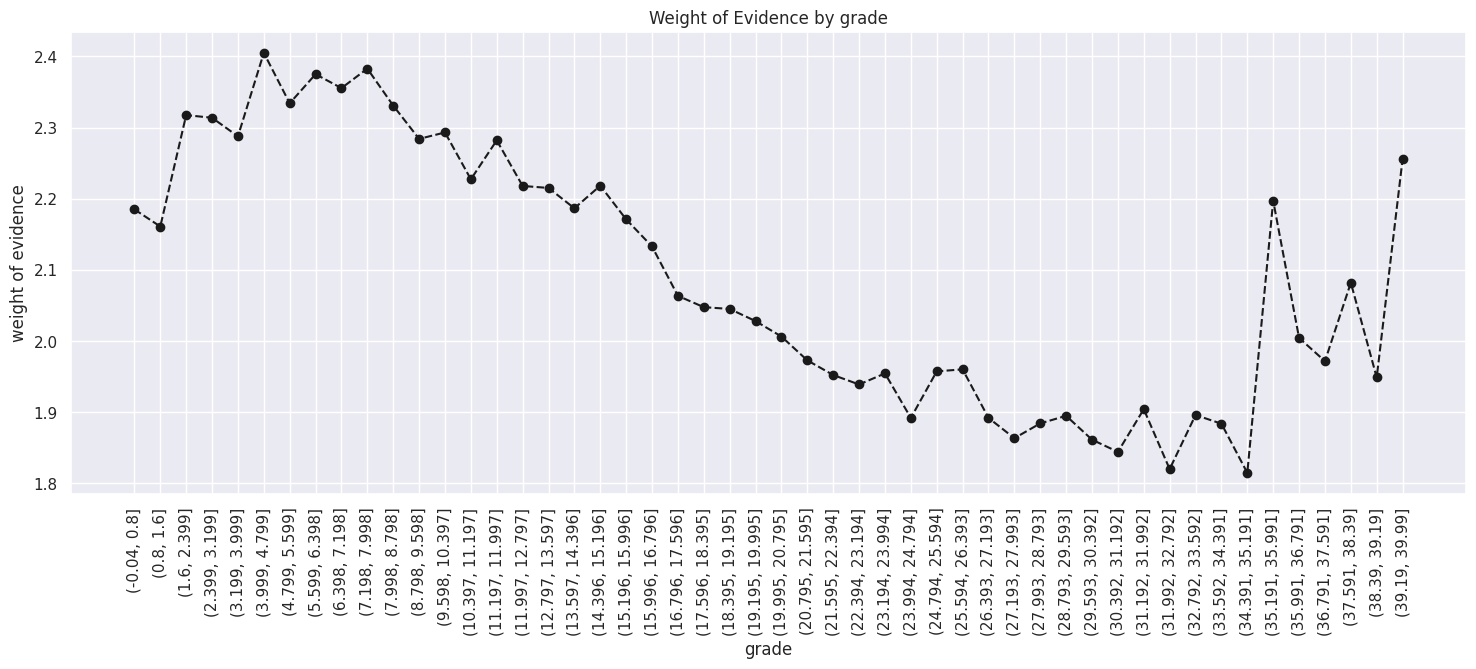

In [391]:
#plot the woe_plot
plot_by_woe(df_cont16,90)

In [392]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['dti:<5']=np.where((df_inputs_prepr['dti']<=5),1,0)
df_inputs_prepr['dti:5-10']=np.where((df_inputs_prepr['dti']>5)&(df_inputs_prepr['dti']<=10),1,0)
df_inputs_prepr['dti:10-15']=np.where((df_inputs_prepr['dti']>10)&(df_inputs_prepr['dti']<=15),1,0)
df_inputs_prepr['dti:15-20']=np.where((df_inputs_prepr['dti']>15)&(df_inputs_prepr['dti']<=20),1,0)
df_inputs_prepr['dti:20-25']=np.where((df_inputs_prepr['dti']>20)&(df_inputs_prepr['dti']<=25),1,0)
df_inputs_prepr['dti:25-30']=np.where((df_inputs_prepr['dti']>25)&(df_inputs_prepr['dti']<=30),1,0)
df_inputs_prepr['dti:30-35']=np.where((df_inputs_prepr['dti']>30)&(df_inputs_prepr['dti']<=35),1,0)
df_inputs_prepr['dti:35-40']=np.where((df_inputs_prepr['dti']>35)&(df_inputs_prepr['dti']<=40),1,0)
df_inputs_prepr['dti:>40']=np.where((df_inputs_prepr['dti']>40),1,0)

In [393]:
#'mths_since_last_record' has null values so take only the notnull values
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

#apply the cut function
df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


<ipython-input-393-404672f877a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


In [394]:
#apply the woe_continuos function
df_cont17=woe_continuous(df_inputs_prepr_temp,'mths_since_last_record',df_targets_prepr)
df_cont17

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1086,0.764273,0.021691,830.0,256.0,0.018569,0.005727,1.176248,NaN,NaN,0.750439
1,"(2.42, 4.84]",76,0.894737,0.001518,68.0,8.0,0.001521,0.000179,2.140066,0.130464,0.963818,0.750439
2,"(4.84, 7.26]",163,0.914110,0.003256,149.0,14.0,0.003334,0.000313,2.364889,0.019374,0.224823,0.750439
3,"(7.26, 9.68]",156,0.903846,0.003116,141.0,15.0,0.003155,0.000336,2.240710,0.010264,0.124179,0.750439
4,"(9.68, 12.1]",292,0.907534,0.005832,265.0,27.0,0.005929,0.000604,2.283893,0.003688,0.043183,0.750439
5,"(12.1, 14.52]",207,0.917874,0.004134,190.0,17.0,0.004251,0.000380,2.413811,0.010340,0.129918,0.750439
6,"(14.52, 16.94]",210,0.928571,0.004194,195.0,15.0,0.004363,0.000336,2.564949,0.010697,0.151139,0.750439
7,"(16.94, 19.36]",334,0.907186,0.006671,303.0,31.0,0.006779,0.000694,2.279746,0.021386,0.285204,0.750439
8,"(19.36, 21.78]",283,0.936396,0.005652,265.0,18.0,0.005929,0.000403,2.689358,0.029210,0.409612,0.750439
9,"(21.78, 24.2]",455,0.898901,0.009088,409.0,46.0,0.009151,0.001029,2.185074,0.037495,0.504284,0.750439


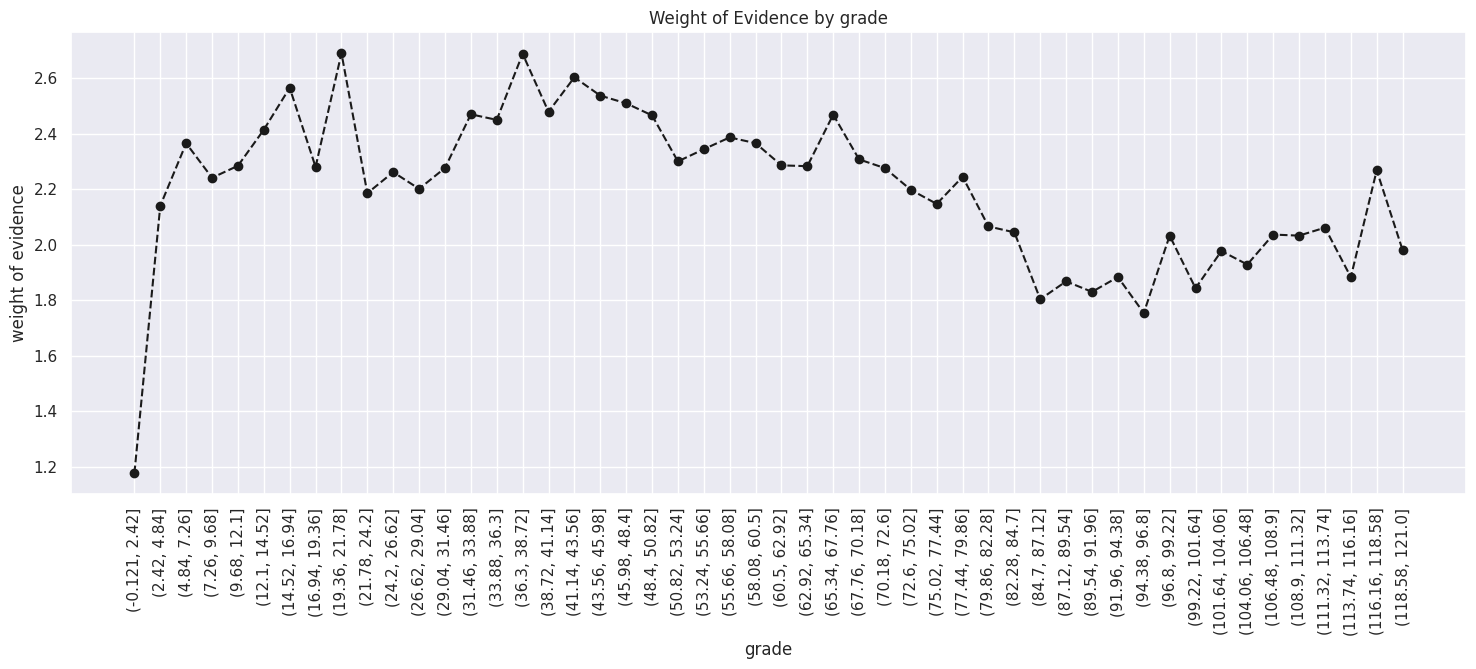

In [395]:
#plot the woe_plot
plot_by_woe(df_cont17,90)

In [396]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_last_record:Missing']=np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr['mths_since_last_record:0-90']=np.where((df_inputs_prepr['mths_since_last_record']>=0)&(df_inputs_prepr['mths_since_last_record']<=90),1,0)
df_inputs_prepr['mths_since_last_record:90-120']=np.where((df_inputs_prepr['mths_since_last_record']>=90)&(df_inputs_prepr['mths_since_last_record']<=120),1,0)
df_inputs_prepr['mths_since_last_record:120-127']=np.where((df_inputs_prepr['mths_since_last_record']>=120)&(df_inputs_prepr['mths_since_last_record']<=127),1,0)
df_inputs_prepr['mths_since_last_record:>=127']=np.where((df_inputs_prepr['mths_since_last_record']>=127),1,0)

In [397]:
#assigning the dataframe into a new variable
loan_data_inputs_train= df_inputs_prepr

In [398]:
loan_data_inputs_train.shape

(373028, 338)

In [399]:
load_ds_targets_train.shape

(373028,)

In [400]:
loan_data_inputs_test= df_inputs_prepr

In [401]:
loan_data_inputs_test.shape

(373028, 338)

In [402]:
load_ds_targets_test.shape

(93257,)

In [403]:
#import the preprosess dataframe into a new csv file

loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
load_ds_targets_train.to_csv('loan_data_targets_train.csv')

loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
load_ds_targets_test.to_csv('loan_data_targets_test.csv')